In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas import DataFrame
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
import pickle
import collections
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import numpy as np
import random
import seaborn as sns

pd.options.display.max_rows=500
pd.options.display.max_columns=999

plt.rcParams['figure.figsize'] = (15, 5)

import warnings; warnings.simplefilter('ignore')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Main dataset
f1 = open("C:\\Users\\User\\Desktop\\DTU\\Thesis\\Python Files\\Files\\FinalDFs\\Dwell_2017_w", 'rb')
df = pickle.load(f1)
f1.close()

# Events
f1 = open("C:\\Users\\User\\Desktop\\DTU\\Thesis\\Python Files\\Files\\events\\READY\\Event_with_topics_label", 'rb')
ev = pickle.load(f1)
f1.close()


# df=df[df['DwellSeconds']>0]

df_60=df[df['DwellSeconds']<60]
df=df[df['DwellSeconds']<90]


df['Time_difference'] = [int(x) for x in df['Time_difference']]

df['event_during_1h_aft']=(df['Time_difference']==-1)*1
df['event_during_2h_aft']=(df['Time_difference']==-2)*1
df['event_during_3h_aft']=(df['Time_difference']==-3)*1
df['event_during_4h_aft']=(df['Time_difference']==-4)*1


f1 = open("C:\\Users\\User\\Desktop\\DTU\\Thesis\\Python Files\\Files\\FinalDFs\\Alighting_2017_w", 'rb')
al = pickle.load(f1)
f1.close()

# Boarding
f1 = open("C:\\Users\\User\\Desktop\\DTU\\Thesis\\Python Files\\Files\\FinalDFs\\Boarding_2017_w", 'rb')
bo = pickle.load(f1)
f1.close()


dfs=[]
i=0
for name in df.PoiName.unique():
    print(i,"= ",name)
    i=i+1
    df_new=df[df['PoiName']==name]
    dfs.append(df_new)

0 =  Parken
1 =  Vega
2 =  Forum
3 =  Bella Center
4 =  DR Koncerthuset
5 =  Royal Arena


In [6]:
len(df)

738813

In [25]:
for mo in range(12):
    mo+=1
    print(mo)
#     plt.scatter(al['hours'][al['TimeStep'].dt.month==mo],al['AlightingPassengerCount'][al['TimeStep'].dt.month==mo])
#     plt.show()
    print(al['AlightingPassengerCount'][al['TimeStep'].dt.month==mo].mean())

1
3.1678282687482575
2
3.353061747373815
3
3.262686567164179
4
3.2295754777478516
5
3.123777363763391
6
3.1884890399718673
7
2.9785898855666297
8
3.308286674132139
9
3.5529848957084633
10
3.5603037859895714
11
3.7786458333333335
12
3.714735002912056


In [8]:
dw

NameError: name 'dw' is not defined

In [3]:
len(df[df.DwellSeconds==0])/len(df)

0.402930105452936

In [6]:
df.DwellSeconds[df.DwellSeconds>0].mean()

21.315593249062157

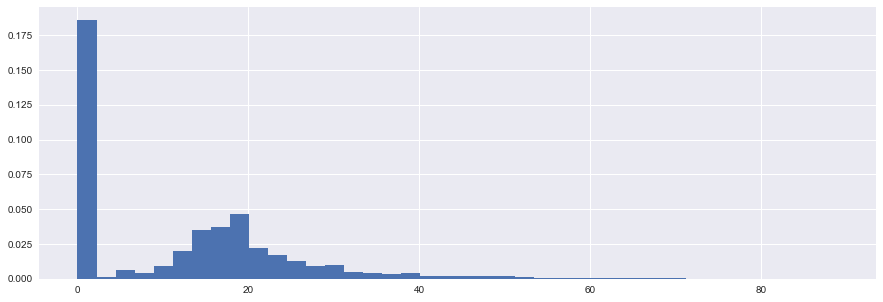

In [7]:
plt.hist(df.DwellSeconds,bins=40,normed=True,);

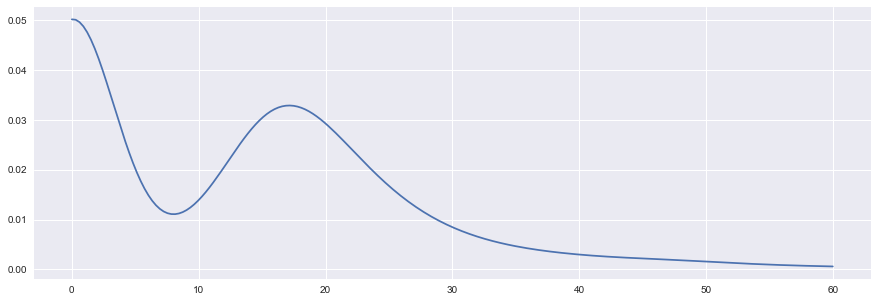

In [8]:
from scipy.stats import gaussian_kde


density = gaussian_kde(df.DwellSeconds)
xs = np.linspace(0,60,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

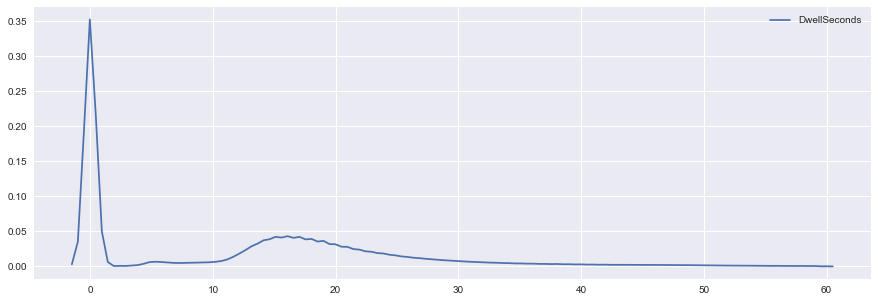

In [9]:
import numpy as np
import seaborn as sns


sns.kdeplot(df_60.DwellSeconds, bw=0.5)

In [10]:
df.columns

Index(['Alternative&Punk_Music', 'Alternative_Music', 'Business', 'Children',
       'Classic_Music', 'Comedy', 'Culture', 'Distance', 'DwellSeconds',
       'DwellSeconds_lag1', 'DwellSeconds_lag2', 'DwellSeconds_lag3',
       'DwellSeconds_lag4', 'DwellSeconds_lag5', 'Electronica_Music',
       'Football', 'Gaming', 'Medicine', 'Metal_Music', 'Music',
       'Music_Festival', 'ObservedArrivalDateTime', 'PoiName', 'Pop_Music',
       'Rock_Music', 'StopPointId', 'Theater', 'Time_difference',
       'Urban_Music', 'event_1h_aft', 'event_1h_bef', 'event_2h_aft',
       'event_2h_bef', 'event_3h_aft', 'event_3h_bef', 'event_during', 'day',
       'hours', 'h_0', 'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8',
       'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'h_17',
       'h_18', 'h_19', 'h_20', 'h_21', 'h_22', 'h_23', 'isWeekend',
       'Distance_venue_trainSt', 'Precipitation', 'Temperature',
       'event_during_1h_aft', 'event_during_2h_aft', 'event_duri

In [11]:
dfs=[]
i=0
for name in df.PoiName.unique():
    print(i,"= ",name)
    i=i+1
    df_new=df[df['PoiName']==name]
    dfs.append(df_new)

0 =  Parken
1 =  Vega
2 =  Forum
3 =  Bella Center
4 =  Royal Arena


In [12]:
cols=['event_1h_aft', 'event_1h_bef', 'event_2h_aft', 'event_2h_bef',
       'event_3h_aft', 'event_3h_bef','event_during_1h_aft',
       'event_during_2h_aft', 'event_during_3h_aft', 'event_during_4h_aft']

In [28]:
for dataf in dfs:
    dataf["isStopping"]=(dataf["DwellSeconds"]>0)*1
    print("-----------------------------------------------------------------")
    print(dataf.PoiName.unique())
    
    for st in dataf.StopPointId.unique():
        dataframe=dataf[dataf['StopPointId']==st]
    
        for c in cols:
            try:
                avT=dataframe['hours'][dataframe[c]==1].mode().values
                avN=dataframe.isStopping[(dataframe['hours']==avT[0])|(dataframe['hours']==avT[0]+1)|(dataframe['hours']==avT[0]-1)].mean()
                avE=dataframe['isStopping'][dataframe[c]==1].mean()
                avN=round(avN,2)
                avE=round(avE,2)
                if (avE-avN)>0.15:
                    print("hour=",avT,st,c,"ev=",avE,"Normal=",avN,"difference", round(avE-avN,2))
            except:
                print(st)

-----------------------------------------------------------------
['Parken']
hour= [20] 1365 event_during_1h_aft ev= 0.51 Normal= 0.34 difference 0.17
hour= [20] 1366 event_during_1h_aft ev= 0.49 Normal= 0.32 difference 0.17
hour= [20] 1409 event_2h_aft ev= 0.61 Normal= 0.41 difference 0.2
hour= [20] 1409 event_during_1h_aft ev= 0.65 Normal= 0.41 difference 0.24
hour= [21] 1409 event_during_2h_aft ev= 0.5 Normal= 0.34 difference 0.16
-----------------------------------------------------------------
['Vega']
-----------------------------------------------------------------
['Forum']
hour= [14] 50822 event_3h_aft ev= 0.42 Normal= 0.26 difference 0.16
hour= [14] 50822 event_during_2h_aft ev= 0.42 Normal= 0.26 difference 0.16
-----------------------------------------------------------------
['Bella Center']
-----------------------------------------------------------------
['Royal Arena']
30941
30941
30941
30941
30941
30941
30941
30941
30941
30941
30942
30942
30942
30942
30942
30942
30942
3

# Analysis on when the event have an imparct

In [11]:
for dataf in dfs:
    print("-----------------------------------------------------------------")
    print(dataf.PoiName.unique())
    
    for st in dataf.StopPointId.unique():
        dataframe=dataf[dataf['StopPointId']==st]
    
        for c in cols:
            try:
                avT=dataframe['hours'][dataframe[c]==1].mode().values
                avN=dataframe.DwellSeconds[dataframe['hours']==avT[0]].mean()
                avE=dataframe['DwellSeconds'][dataframe[c]==1].mean()
                avN=round(avN,1)
                avE=round(avE,1)
                if (avE-avN)>5:
                    print("hour=",avT,st,c,"ev=",avE,"Normal=",avN,"difference", round(avE-avN,1))
            except:
                print(st)

-----------------------------------------------------------------
['Parken']
hour= [19] 1365 event_1h_aft ev= 12.4 Normal= 6.6 difference 5.8
hour= [18] 1365 event_1h_bef ev= 13.9 Normal= 8.3 difference 5.6
hour= [20] 1365 event_2h_aft ev= 11.2 Normal= 5.3 difference 5.9
hour= [17] 1365 event_2h_bef ev= 20.5 Normal= 9.5 difference 11.0
hour= [16] 1365 event_3h_bef ev= 21.5 Normal= 10.9 difference 10.6
hour= [20] 1365 event_during_1h_aft ev= 13.1 Normal= 5.3 difference 7.8
hour= [20] 1366 event_2h_aft ev= 14.6 Normal= 5.7 difference 8.9
hour= [20] 1366 event_during_1h_aft ev= 15.9 Normal= 5.7 difference 10.2
hour= [19] 1409 event_1h_aft ev= 19.0 Normal= 9.4 difference 9.6
hour= [18] 1409 event_1h_bef ev= 20.6 Normal= 12.0 difference 8.6
hour= [20] 1409 event_2h_aft ev= 20.0 Normal= 8.6 difference 11.4
hour= [20] 1409 event_during_1h_aft ev= 21.2 Normal= 8.6 difference 12.6
-----------------------------------------------------------------
['Vega']
----------------------------------------

-----------------------------------------------------------------
['Parken'] hour= 19
feature event_1h_aft


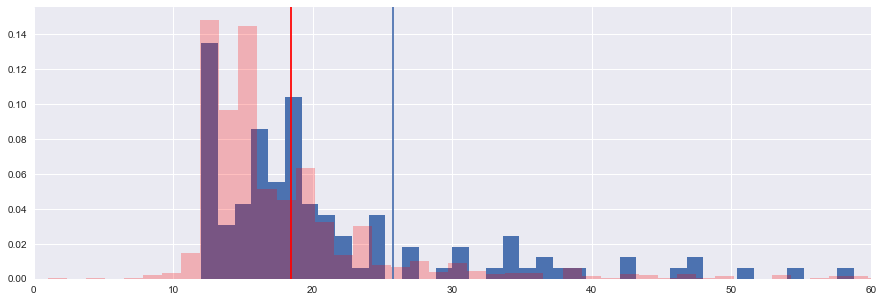

['Parken'] hour= 18
feature event_1h_bef


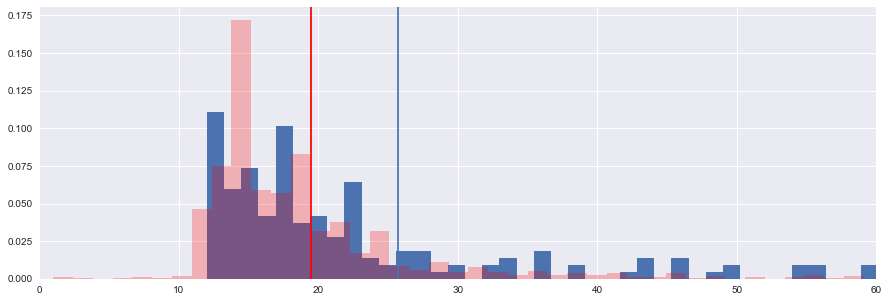

['Parken'] hour= 20
feature event_2h_aft


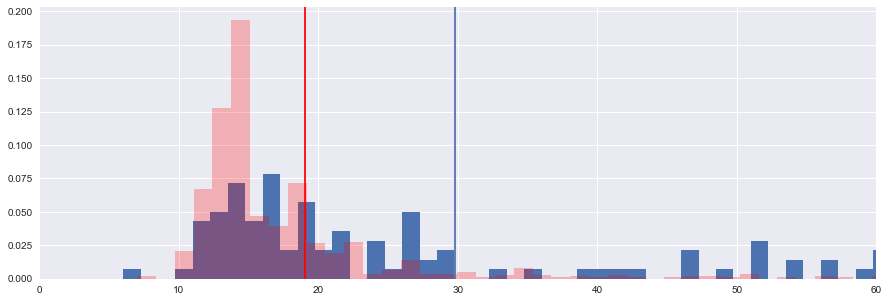

['Parken'] hour= 17
feature event_2h_bef


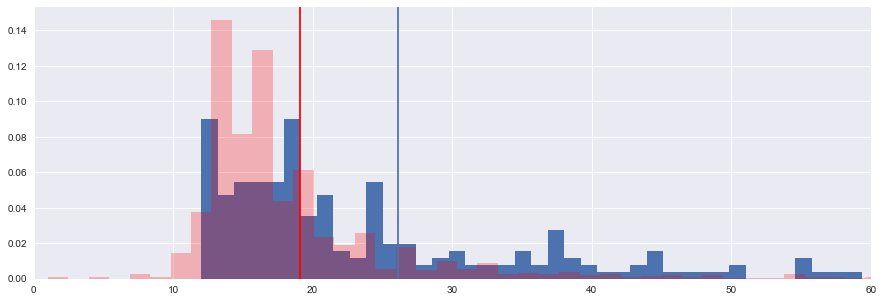

['Parken'] hour= 21
feature event_3h_aft


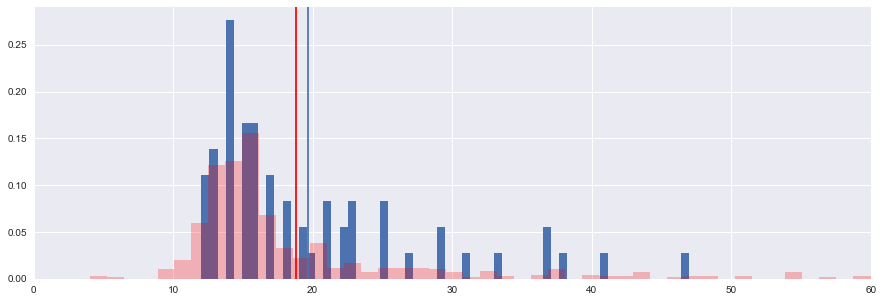

['Parken'] hour= 16
feature event_3h_bef


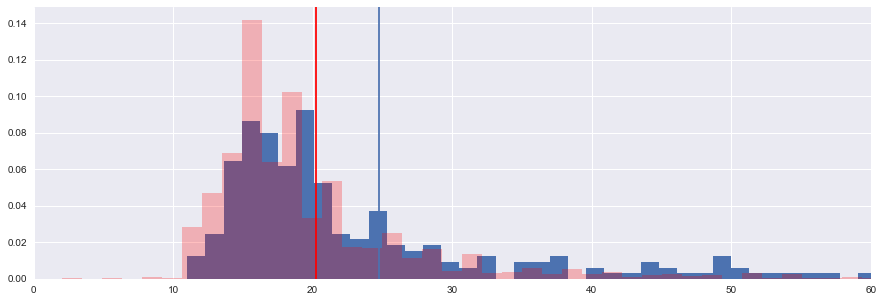

['Parken'] hour= 20
feature event_during_1h_aft


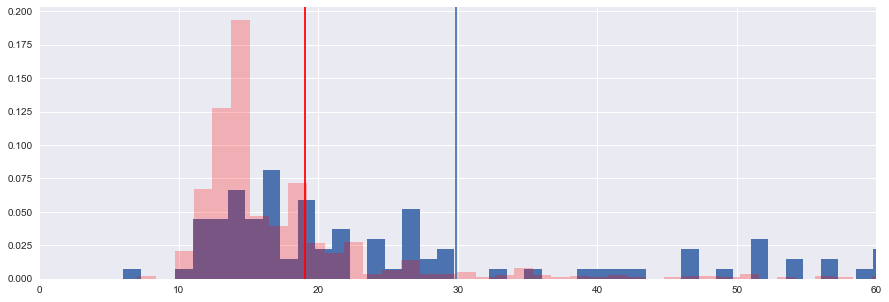

['Parken'] hour= 21
feature event_during_2h_aft


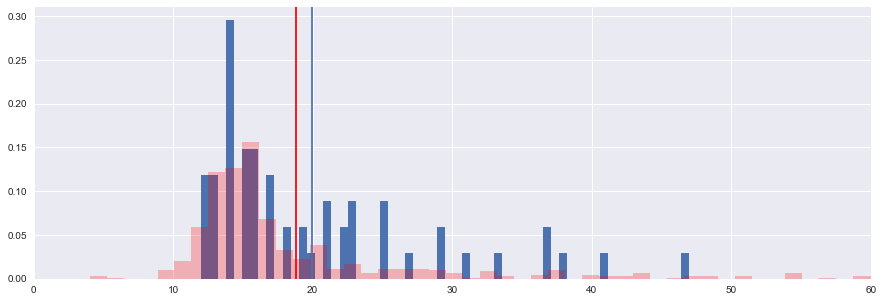

['Parken'] hour= 22
feature event_during_3h_aft


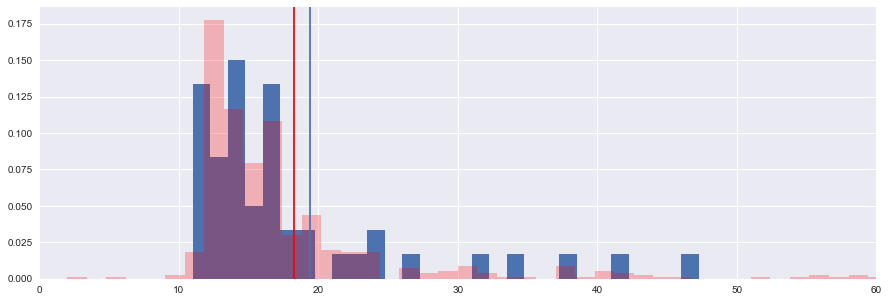

['Parken'] hour= 23
feature event_during_4h_aft


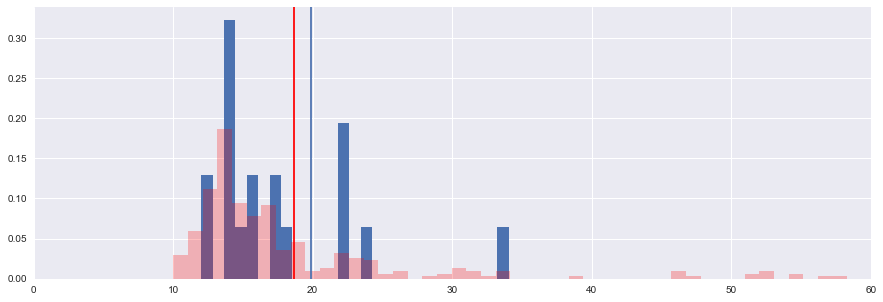

-----------------------------------------------------------------
['Vega'] hour= 23
feature event_1h_aft


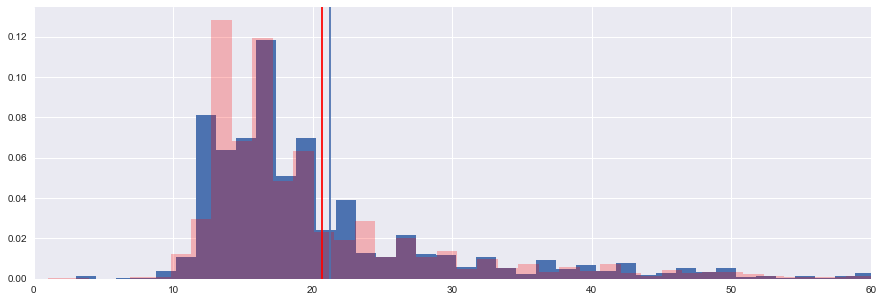

['Vega'] hour= 22
feature event_1h_bef


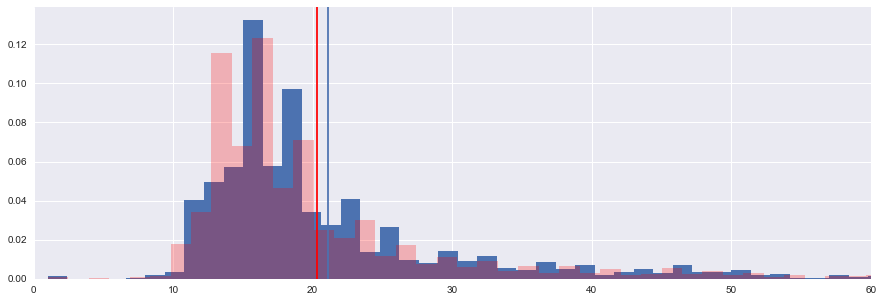

['Vega'] hour= 23
feature event_2h_aft


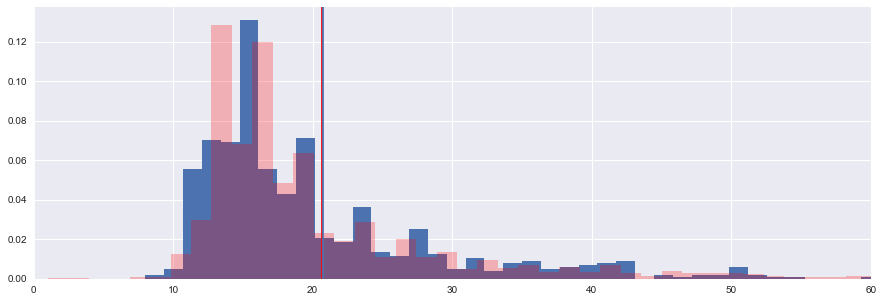

['Vega'] hour= 21
feature event_2h_bef


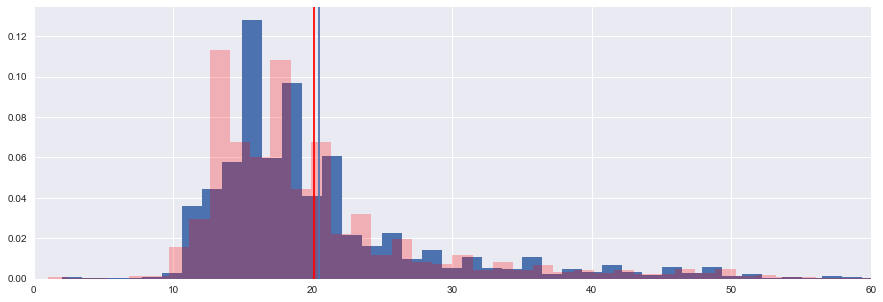

['Vega'] hour= 2
feature event_3h_aft


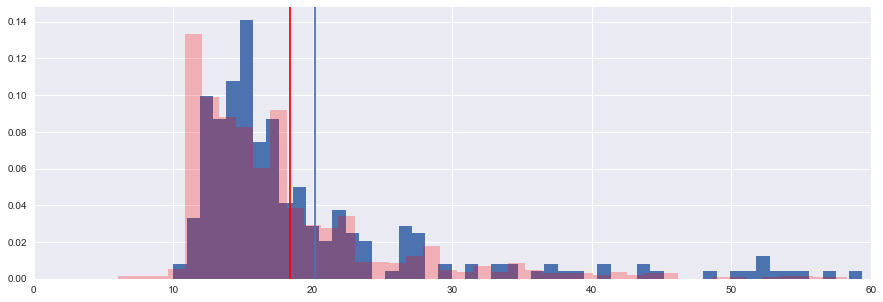

['Vega'] hour= 20
feature event_3h_bef


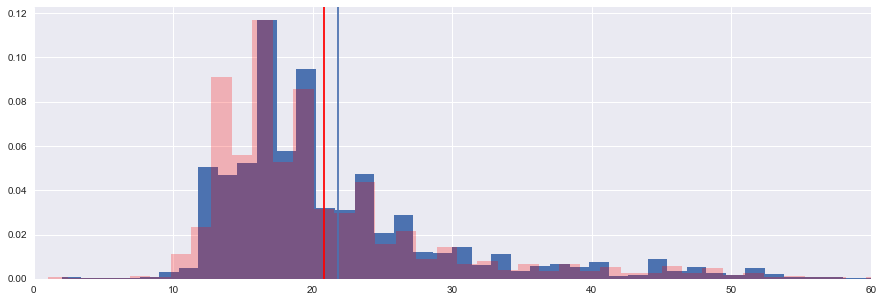

['Vega'] hour= 23
feature event_during_1h_aft


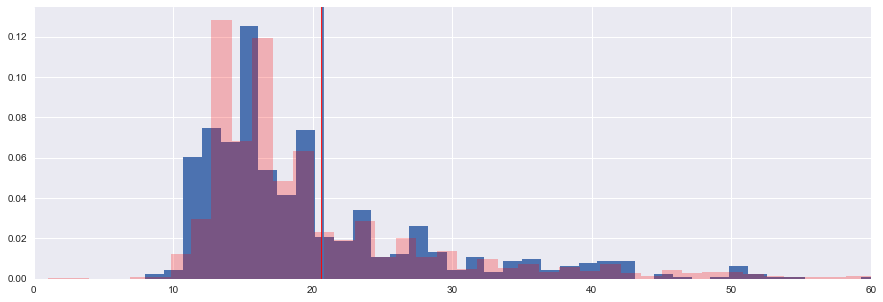

['Vega'] hour= 2
feature event_during_2h_aft


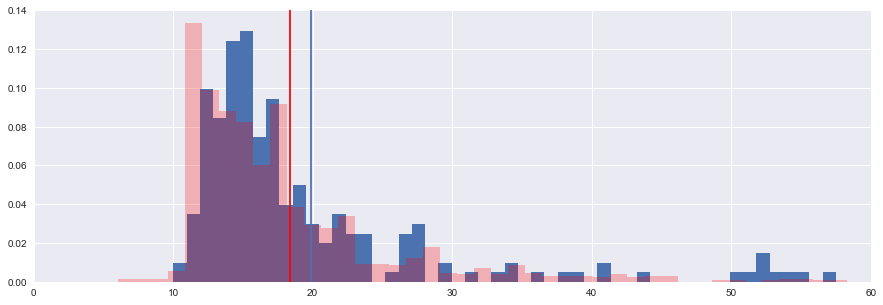

['Vega'] hour= 3
feature event_during_3h_aft


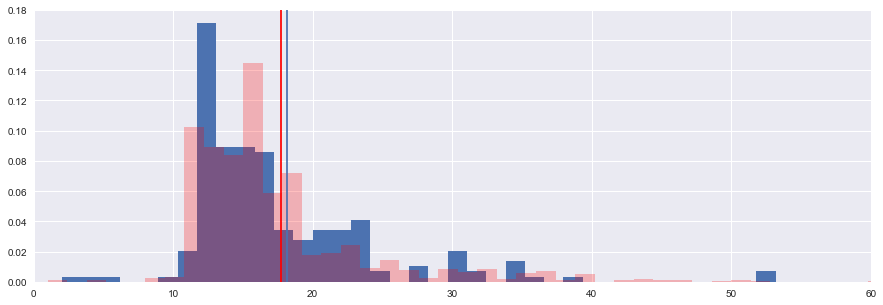

['Vega'] hour= 4
feature event_during_4h_aft


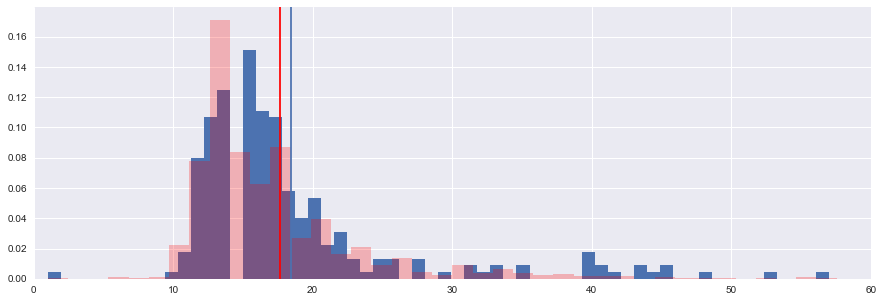

-----------------------------------------------------------------
['Forum'] hour= 17
feature event_1h_aft


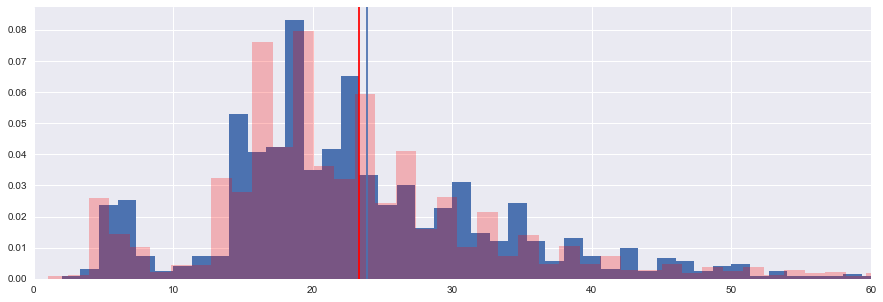

['Forum'] hour= 16
feature event_1h_bef


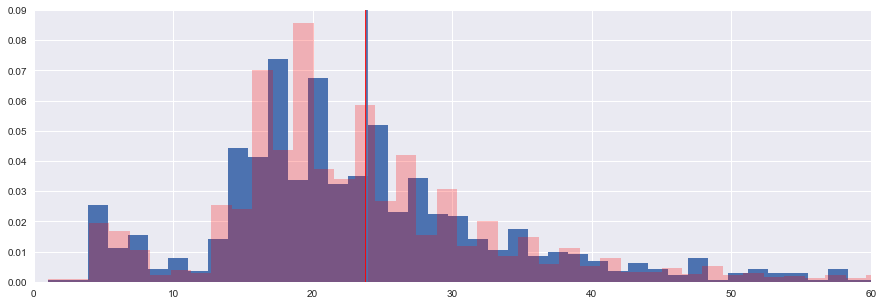

['Forum'] hour= 18
feature event_2h_aft


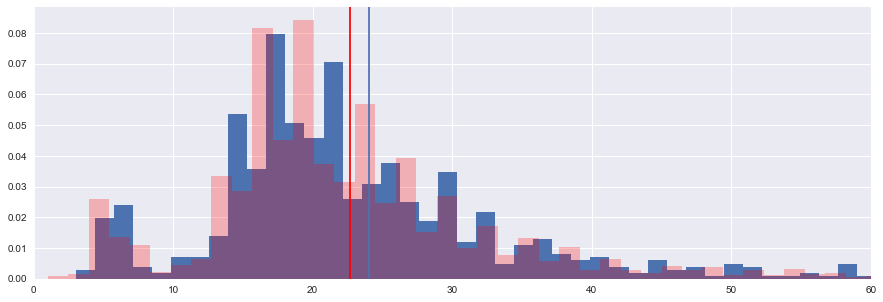

['Forum'] hour= 15
feature event_2h_bef


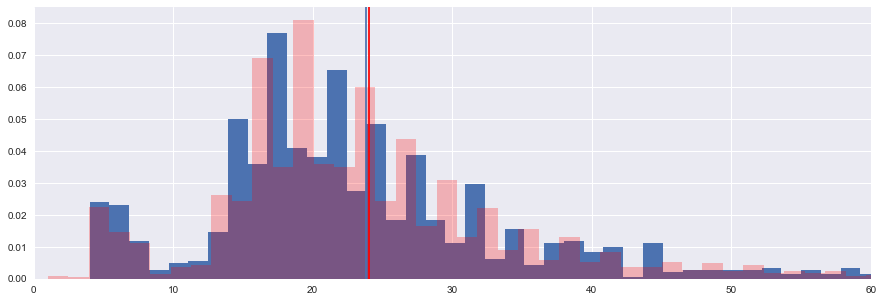

['Forum'] hour= 19
feature event_3h_aft


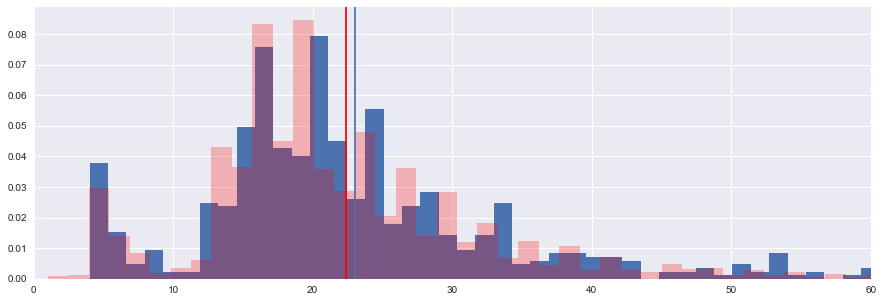

['Forum'] hour= 14
feature event_3h_bef


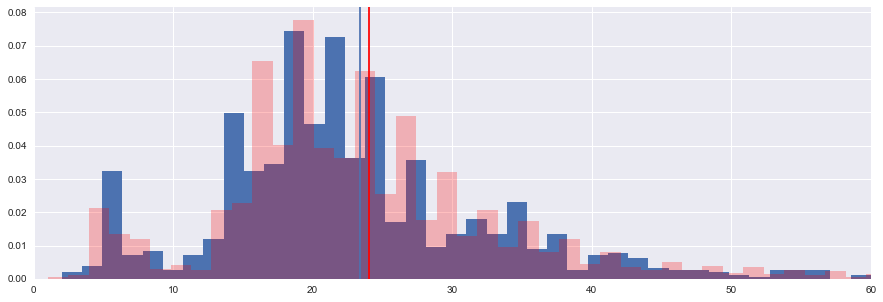

['Forum'] hour= 18
feature event_during_1h_aft


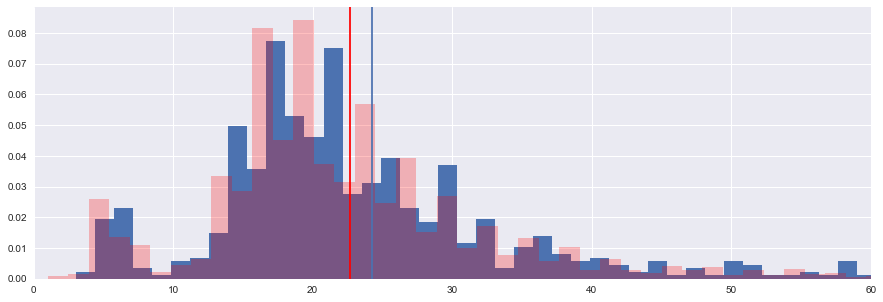

['Forum'] hour= 19
feature event_during_2h_aft


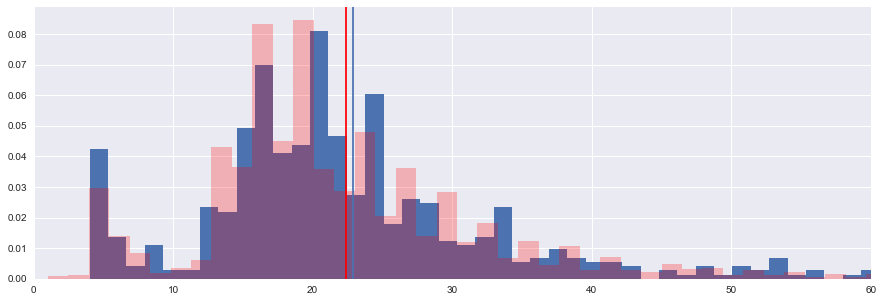

['Forum'] hour= 20
feature event_during_3h_aft


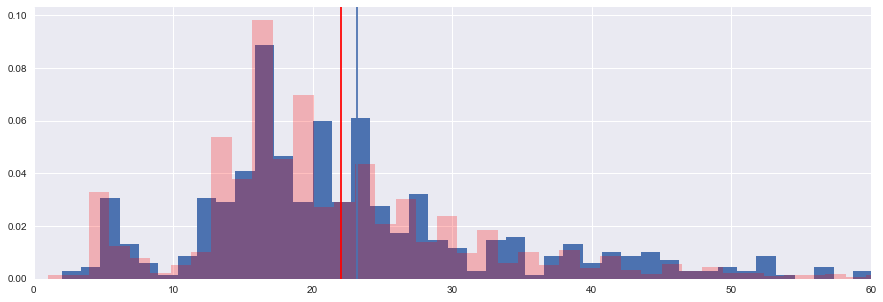

['Forum'] hour= 21
feature event_during_4h_aft


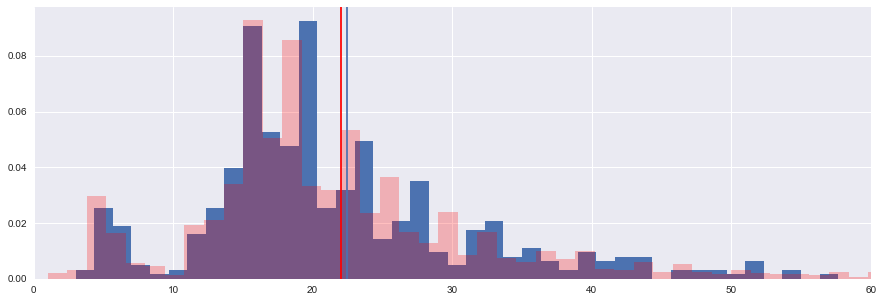

-----------------------------------------------------------------
['Bella Center'] hour= 18
feature event_1h_aft


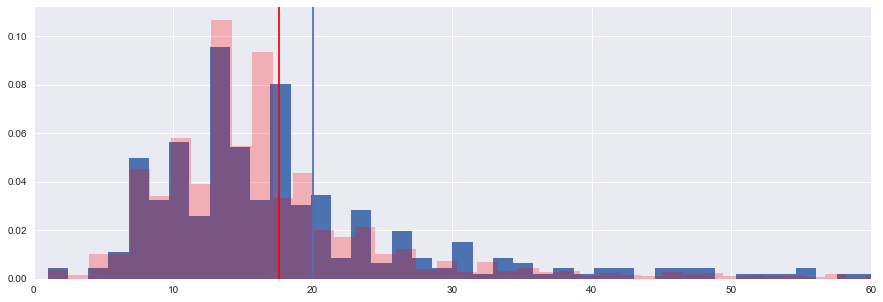

['Bella Center'] hour= 17
feature event_1h_bef


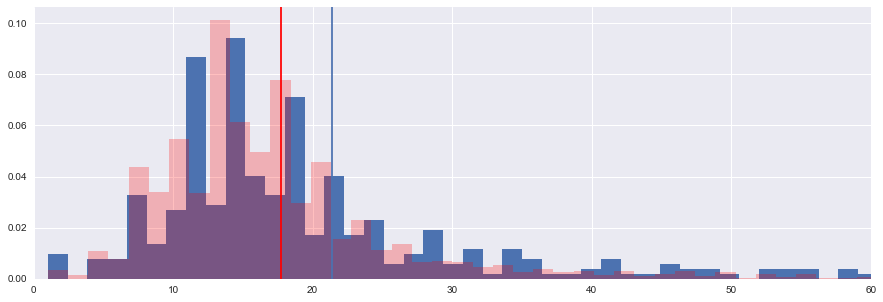

['Bella Center'] hour= 19
feature event_2h_aft


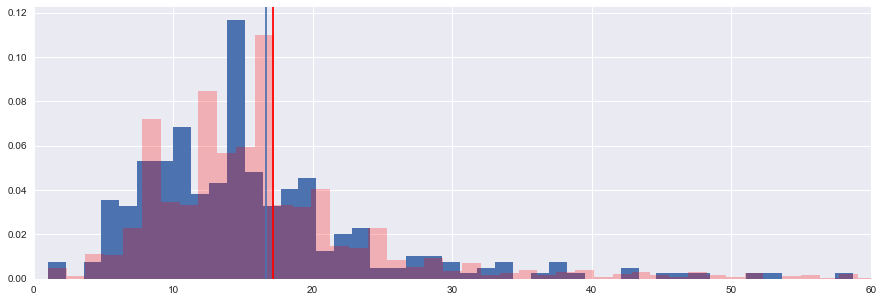

['Bella Center'] hour= 16
feature event_2h_bef


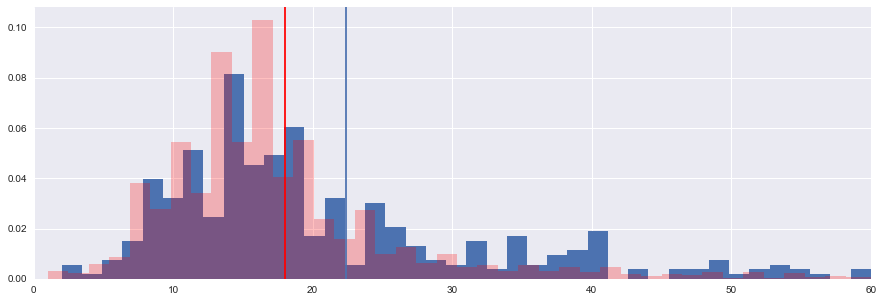

['Bella Center'] hour= 15
feature event_3h_aft


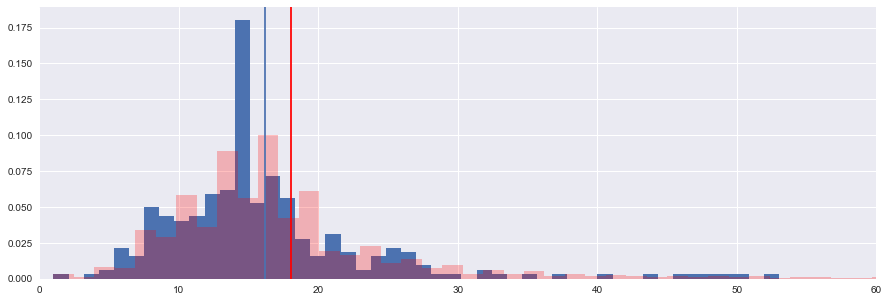

['Bella Center'] hour= 15
feature event_3h_bef


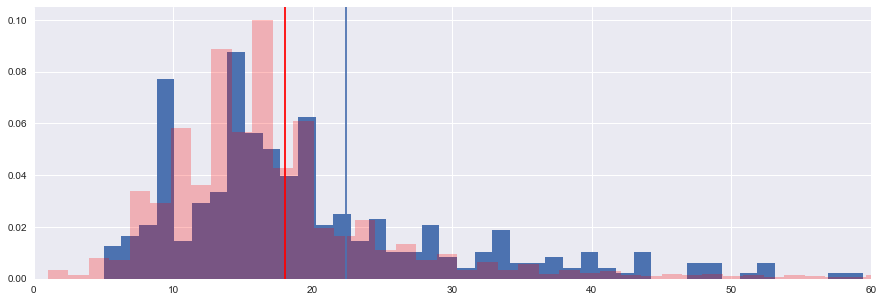

['Bella Center'] hour= 19
feature event_during_1h_aft


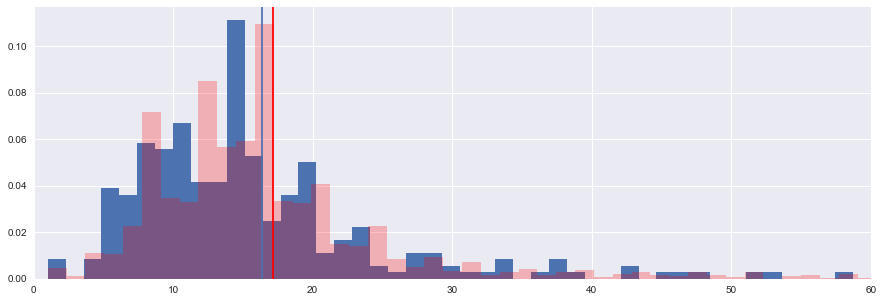

['Bella Center'] hour= 15
feature event_during_2h_aft


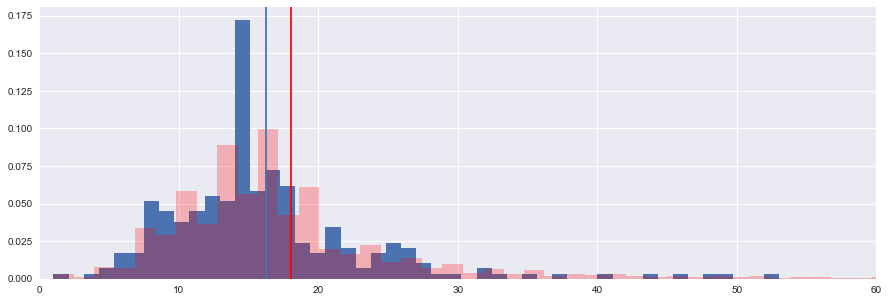

['Bella Center'] hour= 16
feature event_during_3h_aft


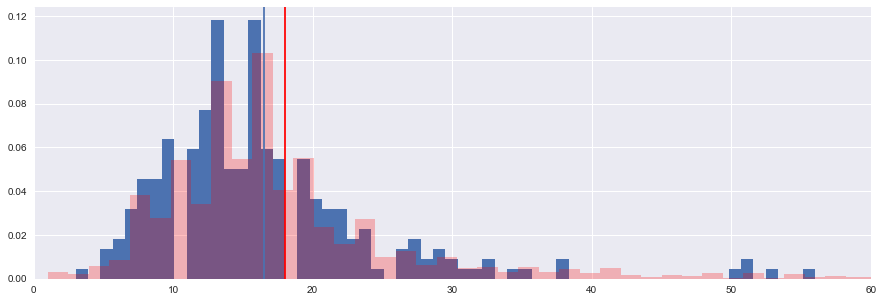

['Bella Center'] hour= 17
feature event_during_4h_aft


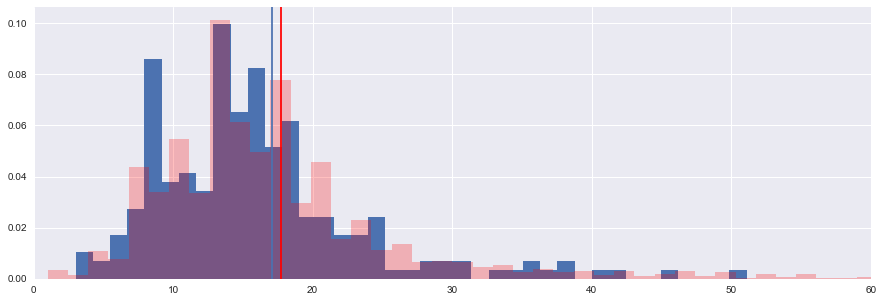

-----------------------------------------------------------------
['DR Koncerthuset'] hour= 23
feature event_1h_aft


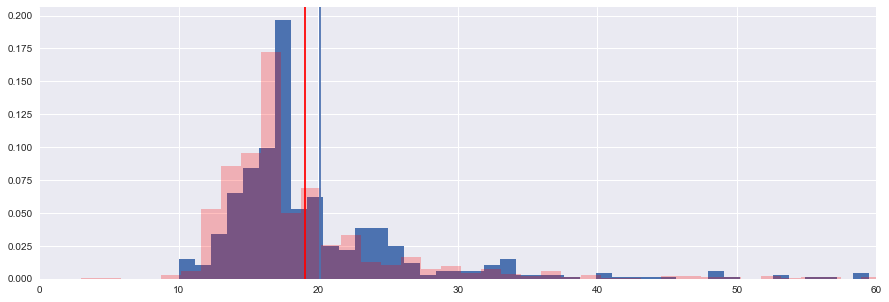

['DR Koncerthuset'] hour= 22
feature event_1h_bef


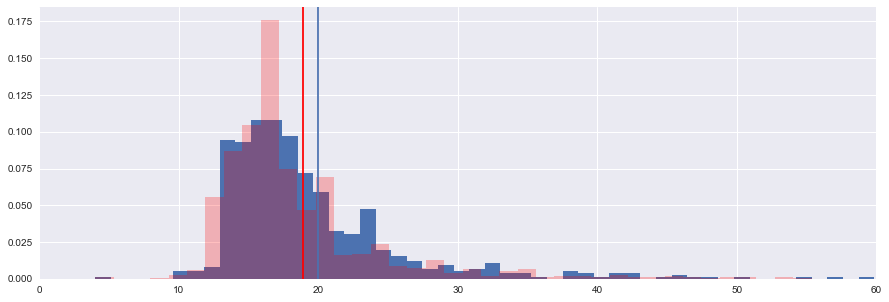

['DR Koncerthuset'] hour= 23
feature event_2h_aft


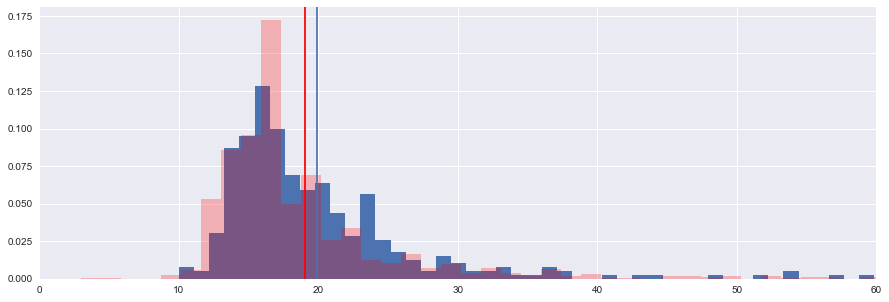

['DR Koncerthuset'] hour= 21
feature event_2h_bef


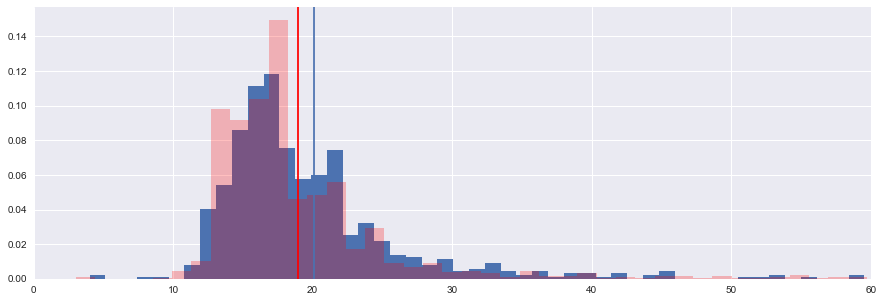

['DR Koncerthuset'] hour= 19
feature event_3h_aft


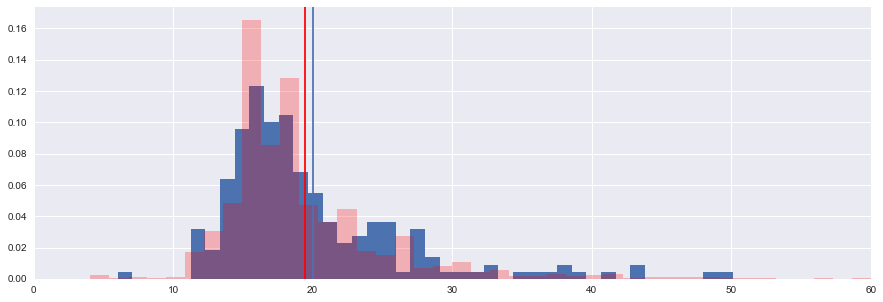

['DR Koncerthuset'] hour= 20
feature event_3h_bef


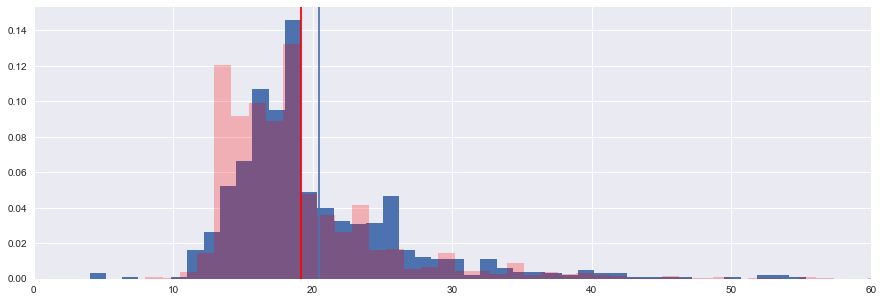

['DR Koncerthuset'] hour= 23
feature event_during_1h_aft


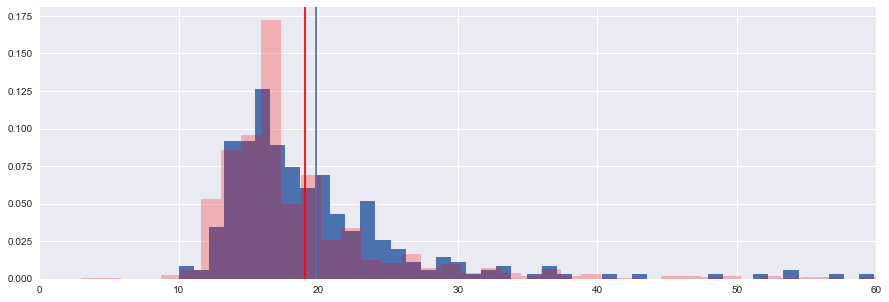

['DR Koncerthuset'] hour= 19
feature event_during_2h_aft


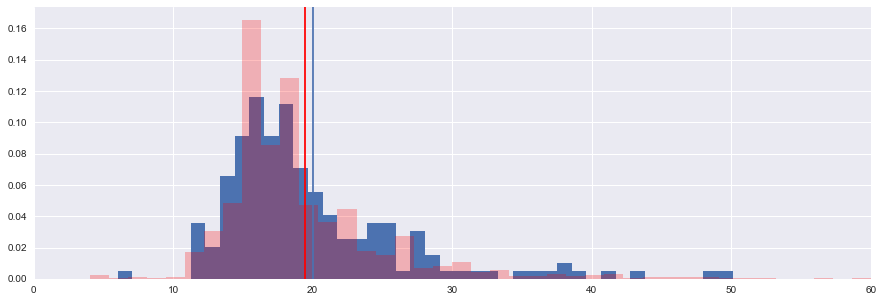

['DR Koncerthuset'] hour= 20
feature event_during_3h_aft


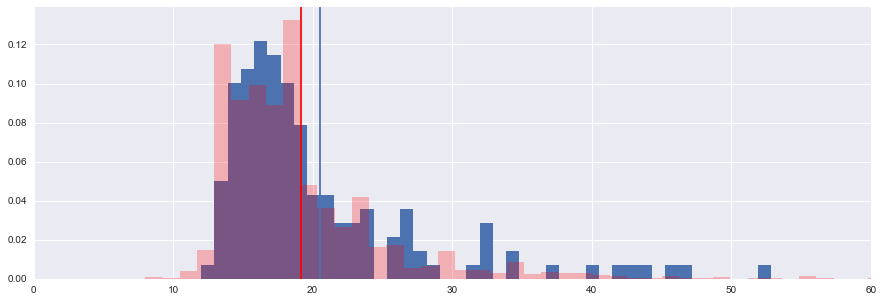

['DR Koncerthuset'] hour= 21
feature event_during_4h_aft


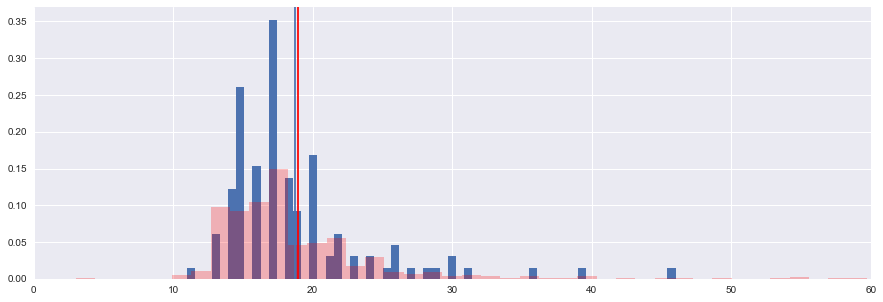

-----------------------------------------------------------------
['Royal Arena'] hour= 18
feature event_1h_aft


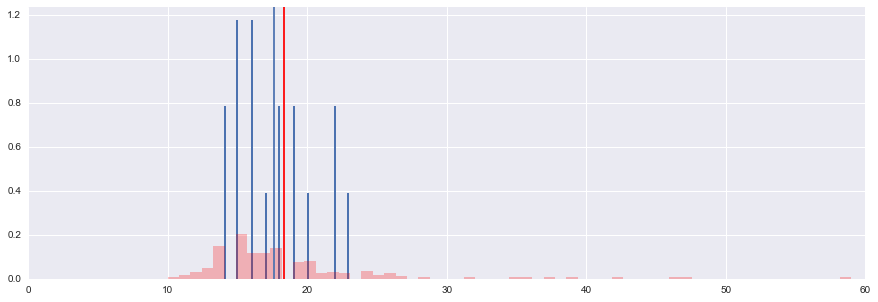

['Royal Arena'] hour= 17
feature event_1h_bef


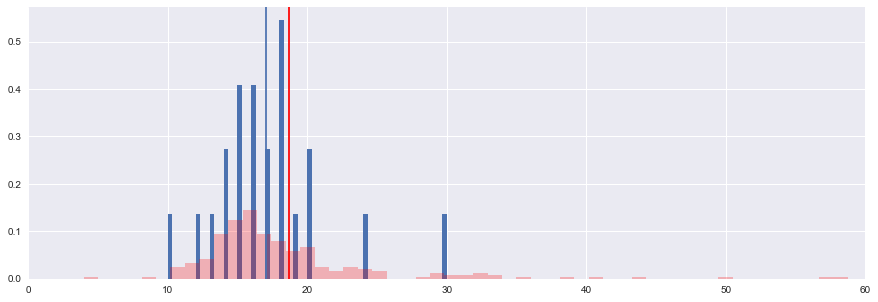

['Royal Arena'] hour= 14
feature event_2h_aft


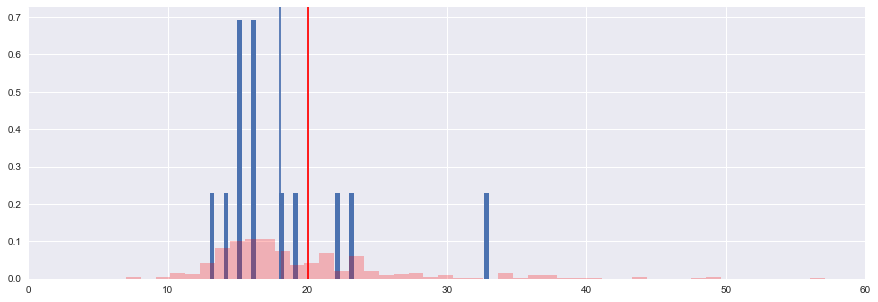

['Royal Arena'] hour= 21
feature event_2h_bef


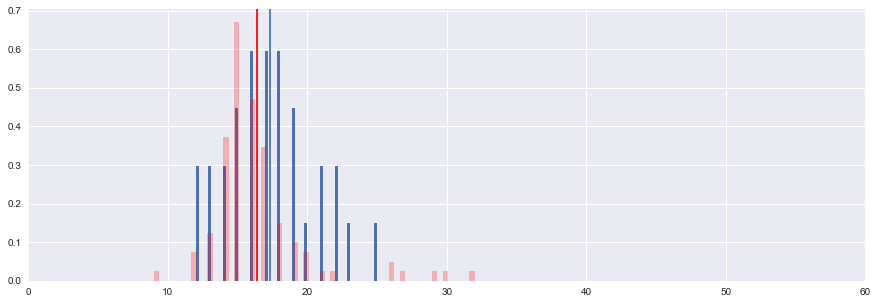

['Royal Arena'] hour= 21
feature event_3h_aft


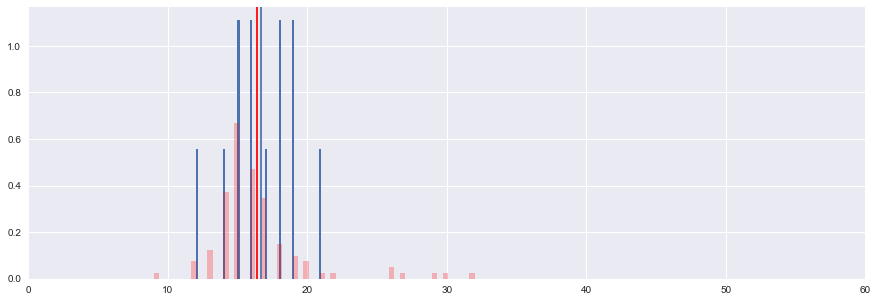

['Royal Arena'] hour= 18
feature event_3h_bef


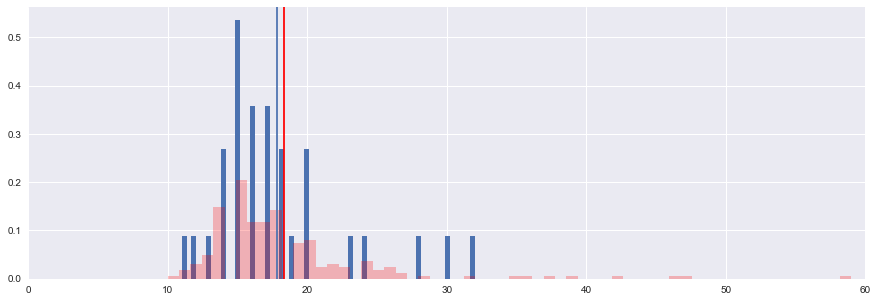

['Royal Arena'] hour= 14
feature event_during_1h_aft


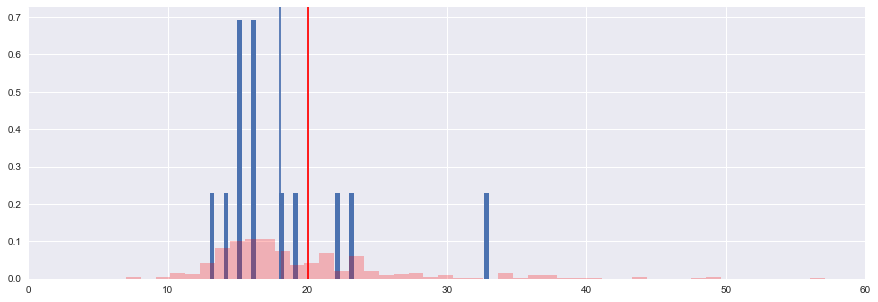

['Royal Arena'] hour= 21
feature event_during_2h_aft


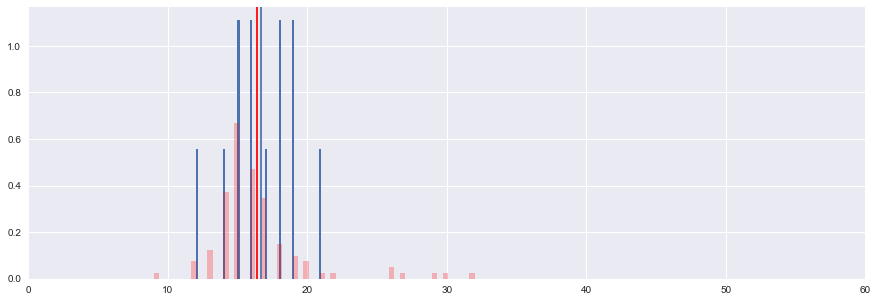

['Royal Arena'] hour= 16
feature event_during_3h_aft


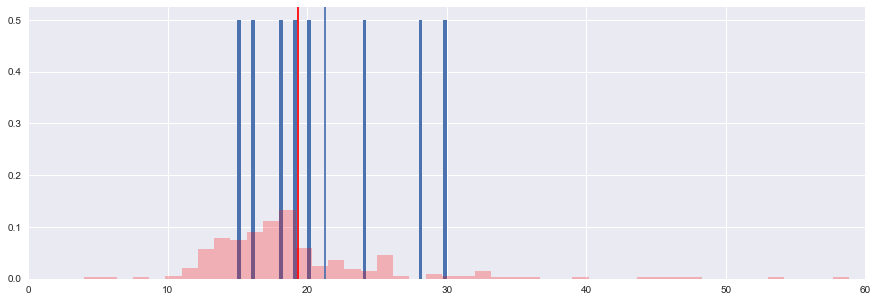

['Royal Arena'] hour= 17
feature event_during_4h_aft


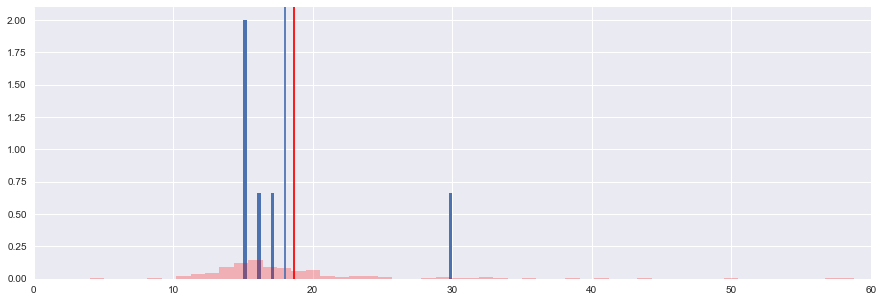

In [61]:
for dataframe in dfs:
    print("-----------------------------------------------------------------")
    
    for c in cols:
        av=dataframe['hours'][dataframe[c]==1].mode().values
        print(dataframe.PoiName.unique(),"hour=",av[0])
        print("feature",c)
        plt.hist(dataframe['DwellSeconds'][dataframe[c]==1],normed=True,bins=60)
        plt.hist(dataframe.DwellSeconds[dataframe['hours']==av[0]],normed=True,bins=60,fc=(1, 0, 0, 0.25))
        plt.axvline(x=dataframe.DwellSeconds[dataframe['hours']==av[0]].mean(),color='r')
        plt.axvline(x=dataframe['DwellSeconds'][dataframe[c]==1].mean())
        plt.xlim(0,60)
        plt.show()

In [14]:
a=[]
b=[]
for i in range(201):
    i=i-100
    i=i/100
    a.append((1-i**2)**(1/2))

In [19]:
plt.rcParams['figure.figsize'] = (7, 5)

plt.scatter(a)

TypeError: scatter() missing 1 required positional argument: 'y'

In [24]:
b=[]
for i in range(201):
    b.append(-50)

(0, 60)

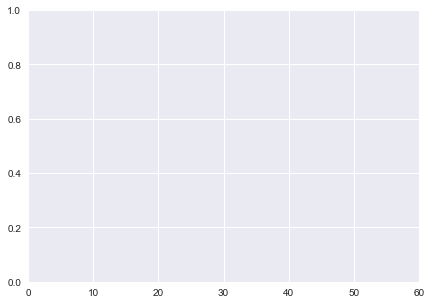

In [28]:
plt.plot(b)
plt.ylim(0,1)
plt.xlim(0,60)

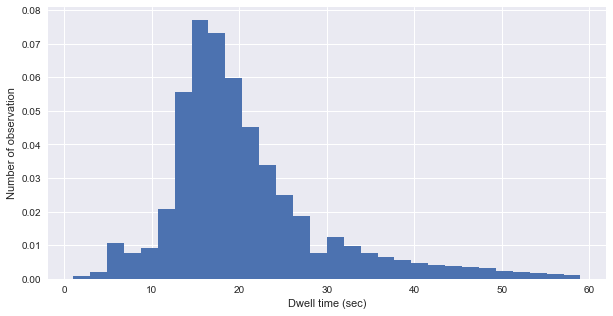

In [7]:
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df_60['DwellSeconds'],bins=30, normed=True)
plt.xlabel("Dwell time (sec)")
plt.ylabel("Number of observation")

# sns.distplot(df_60['DwellSeconds'])



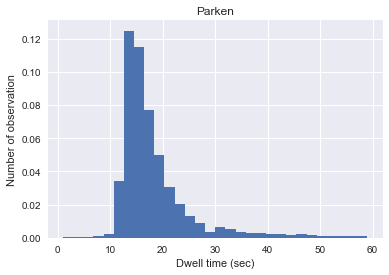

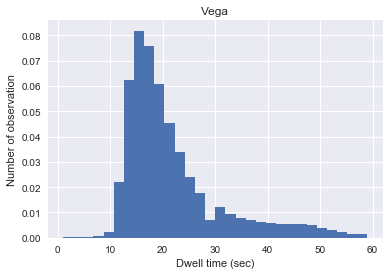

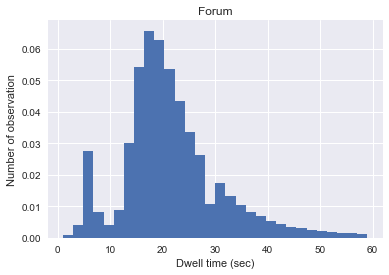

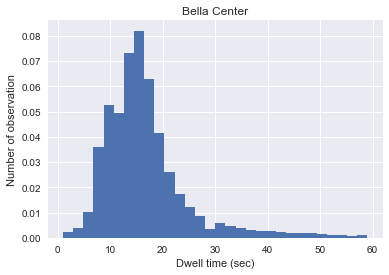

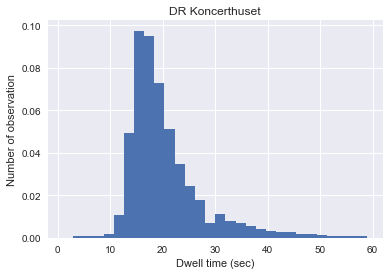

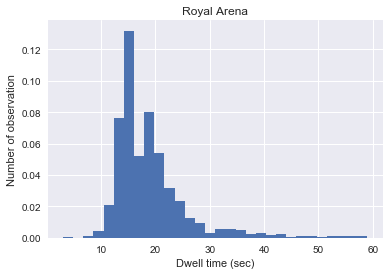

In [8]:
plt.rcParams['figure.figsize'] = (6, 4)

for ven in df_60.PoiName.unique():
    venue=df_60[df_60['PoiName']==ven]
    
    plt.hist(venue['DwellSeconds'],bins=30, normed=True)
    plt.xlabel("Dwell time (sec)")
    plt.ylabel("Number of observation")
    plt.title(ven)
    plt.show()

In [9]:
for ven in df_60.PoiName.unique():
    venue=df_60[df_60['PoiName']==ven]
    print(ven,len(venue))

Parken 27136
Vega 154010
Forum 143205
Bella Center 56939
DR Koncerthuset 51228
Royal Arena 3402


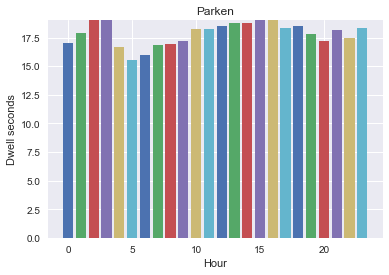

Rate of zeros 0 %


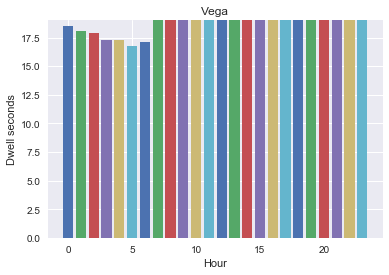

Rate of zeros 0 %


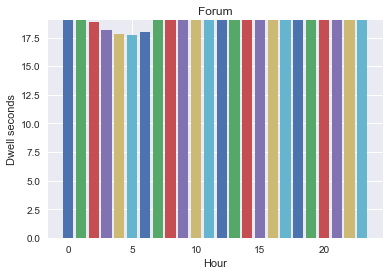

Rate of zeros 0 %


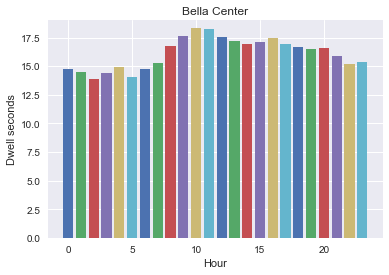

Rate of zeros 0 %


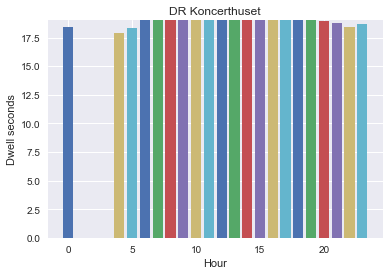

Rate of zeros 0 %


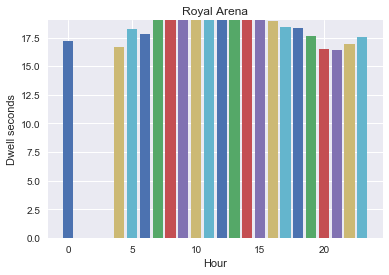

Rate of zeros 0 %


In [10]:
plt.rcParams['figure.figsize'] = (6, 4)



for ven in df_60.PoiName.unique():
    venue=df_60[df_60['PoiName']==ven]
    for i in range(24):
        plt.bar(i,np.mean(venue['DwellSeconds'][venue['hours']==i]))
        plt.ylabel("Dwell seconds")
        plt.xlabel("Hour")
        plt.ylim([0,19])
        plt.title(ven)
    plt.show()
    print("Rate of zeros",int(100*len(venue[venue['DwellSeconds']==0])/len(venue)),"%")

In [11]:
len(df)

441123

In [12]:
len(df[df['DwellSeconds']==0])/len(df)

np.mean(df['DwellSeconds'][df['DwellSeconds']>0])

21.27300322132376

20.692588089557717

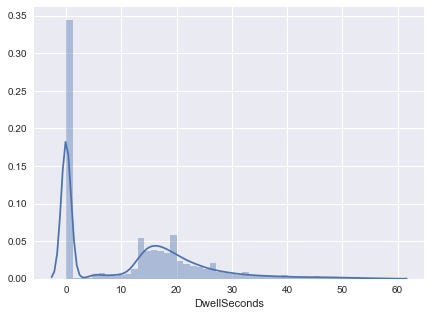

In [24]:
plt.rcParams['figure.figsize'] = (7, 5)

sns.distplot(df_60['DwellSeconds'])



df_60['DwellSeconds'][df_60['DwellSeconds']>0].mean()

In [86]:
ev['starting_time']=pd.to_datetime(ev['starting_time'],format="%Y-%m-%d %H:%M:%S")

list_event_per_ven=[]
for name in ev.venue_unique.unique():
    ev_1ve=ev[ev['venue_unique']==name]
    list_event_per_ven.append(ev_1ve)
    print(name)
print("\n")
    
dw_per_ven=[]   
for ven in df_60.PoiName.unique():
    venue=df_60[df_60['PoiName']==ven]
    dw_per_ven.append(venue)
    print(ven)

DrKoncerthuset
ForumCopenhagen
RoyalArena
Vega
TeliaParken
BellaCenter


Parken
Vega
Forum
Bella Center
DR Koncerthuset
Royal Arena


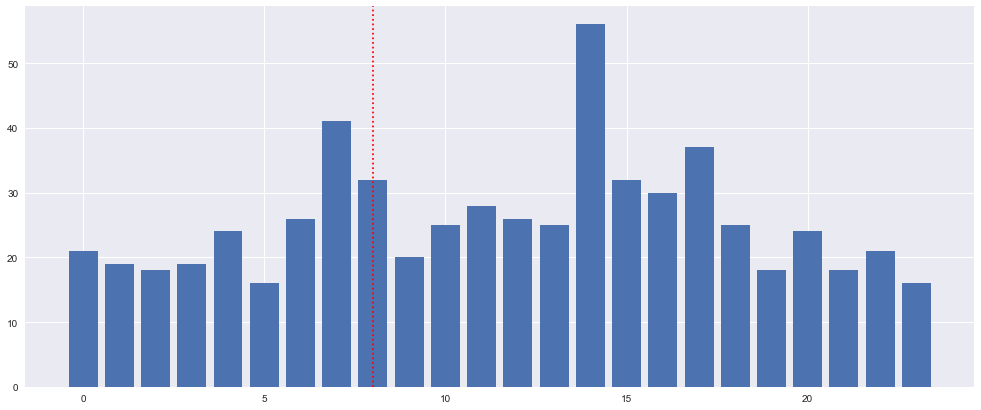

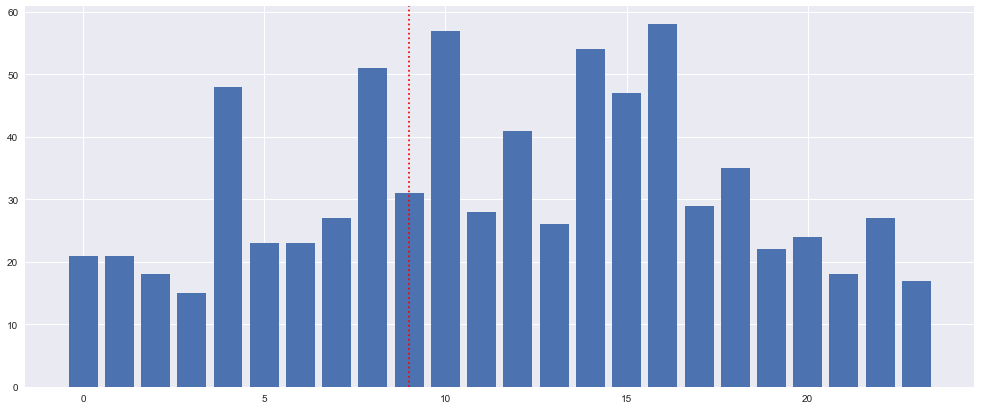

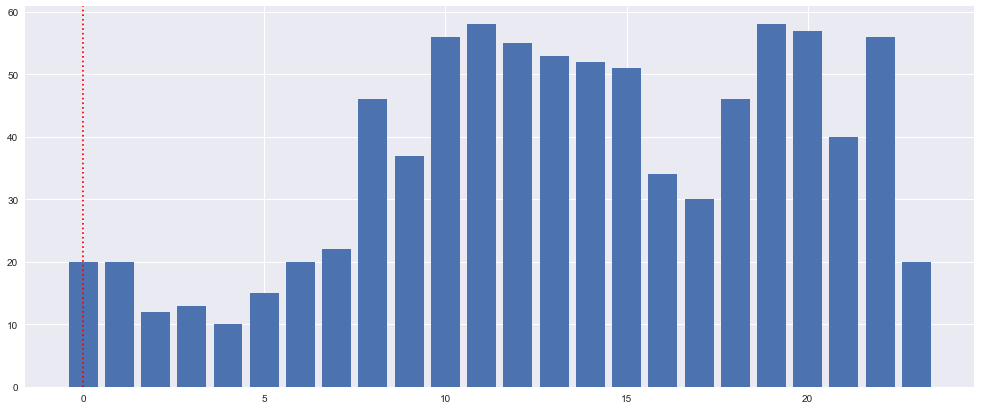

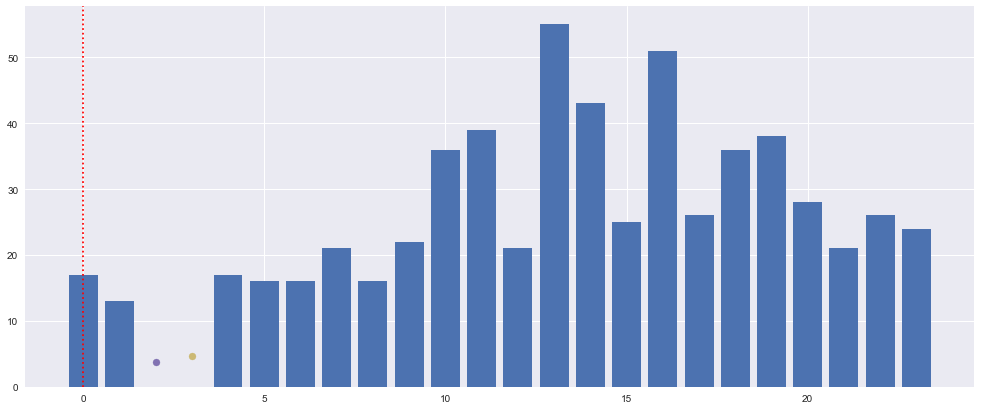

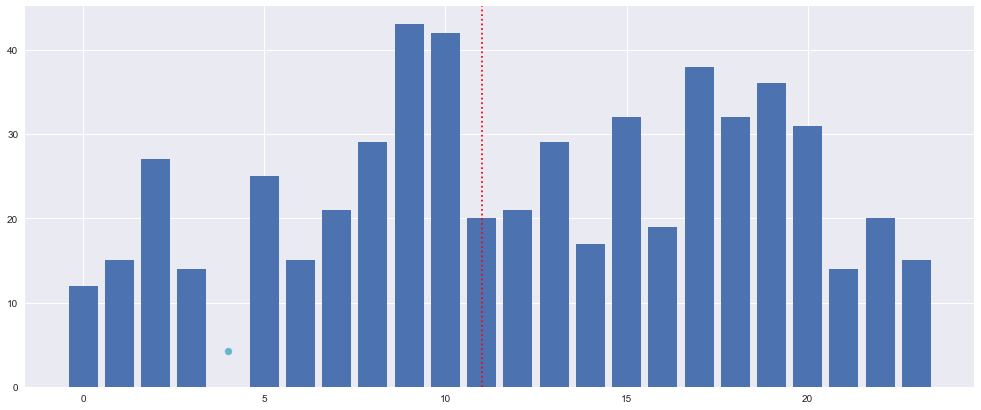

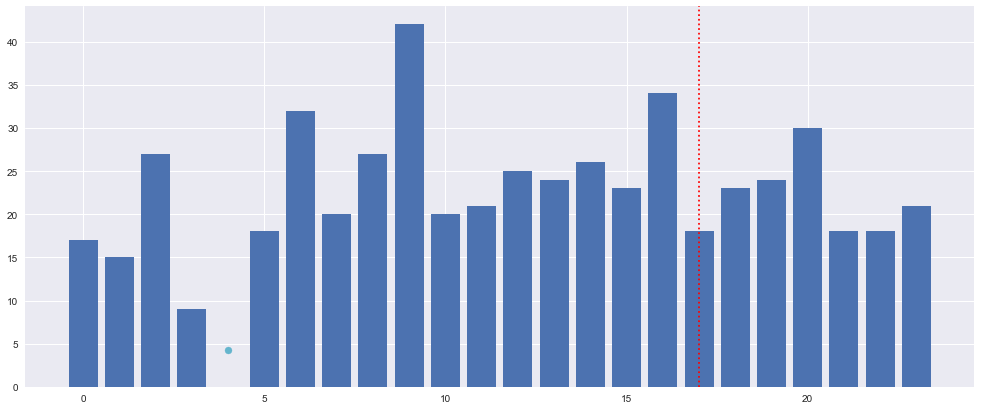

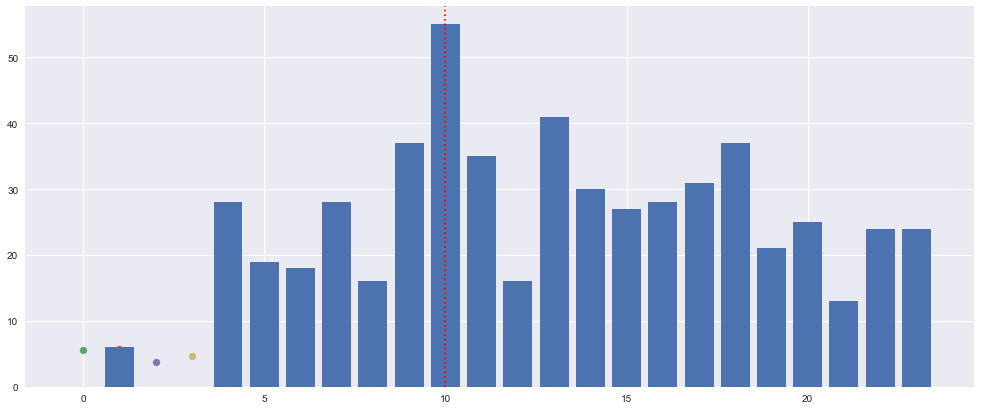

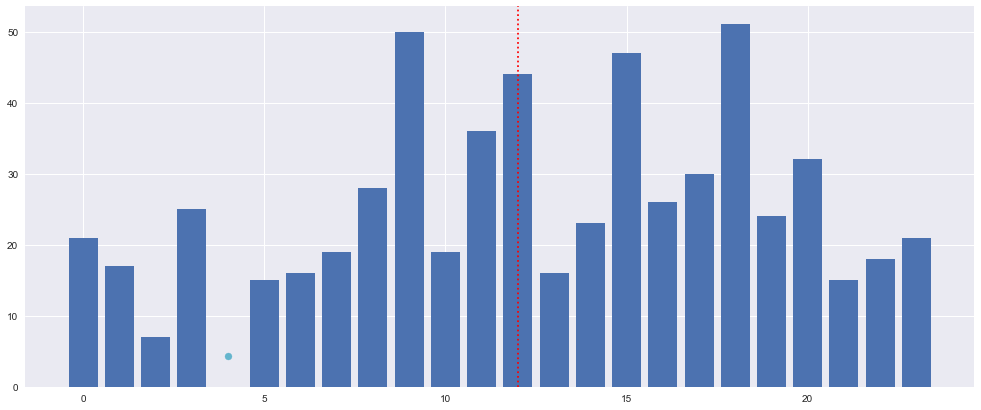

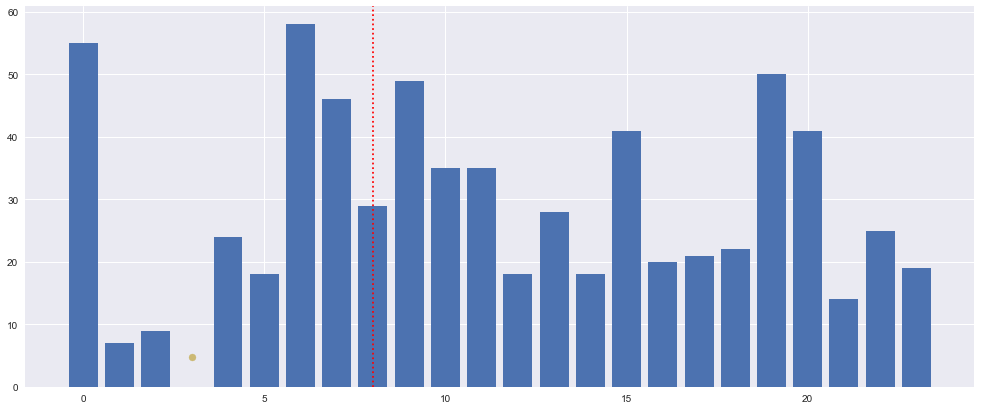

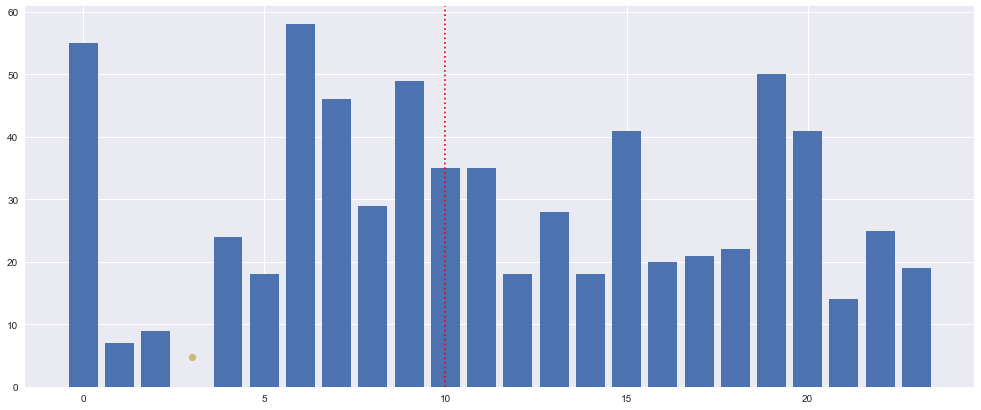

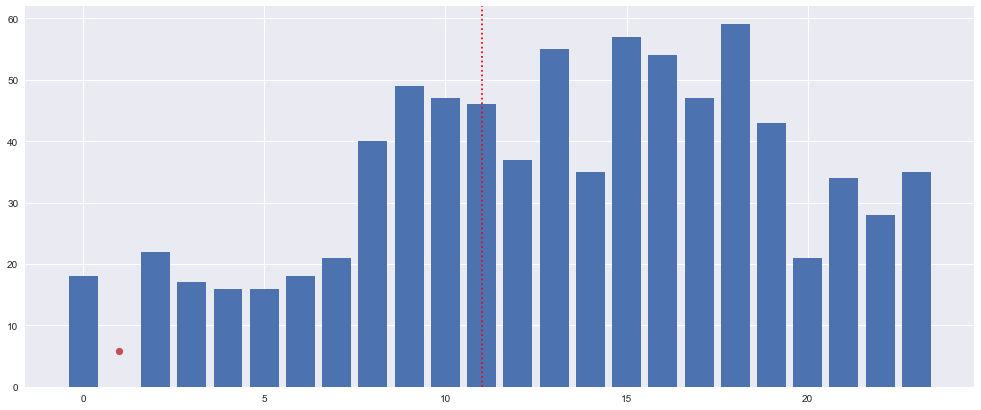

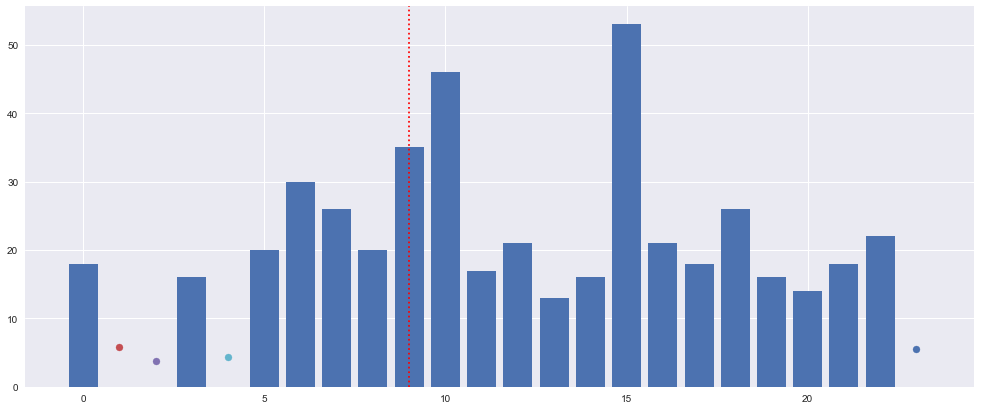

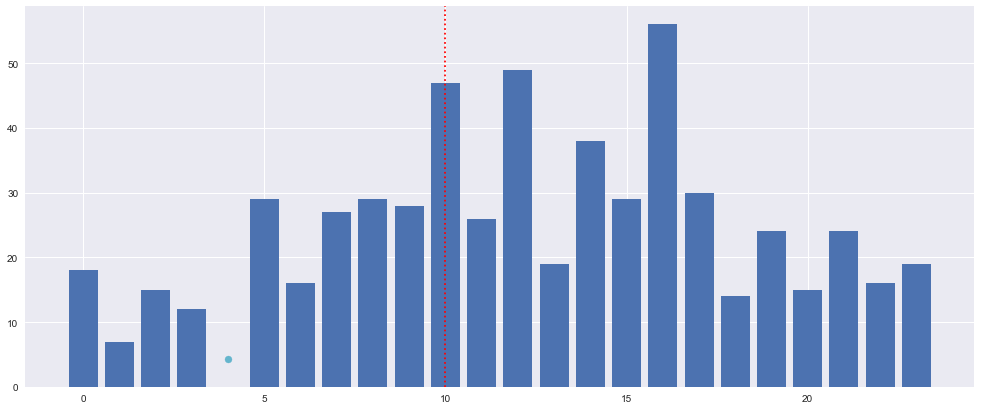

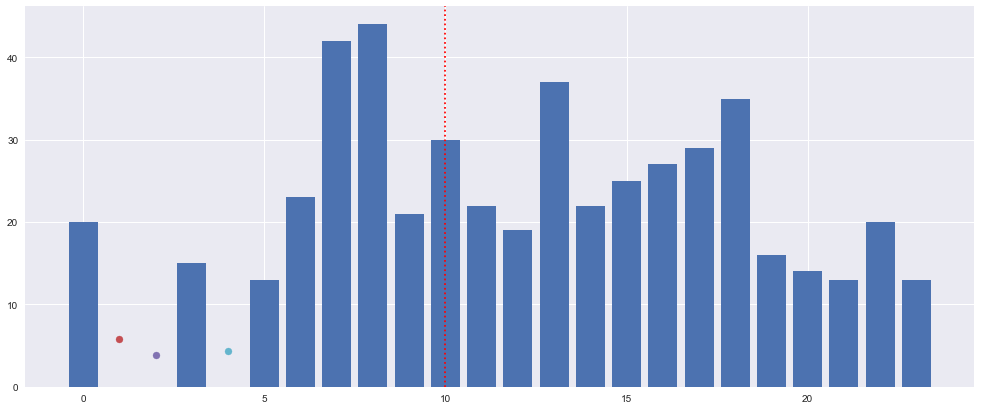

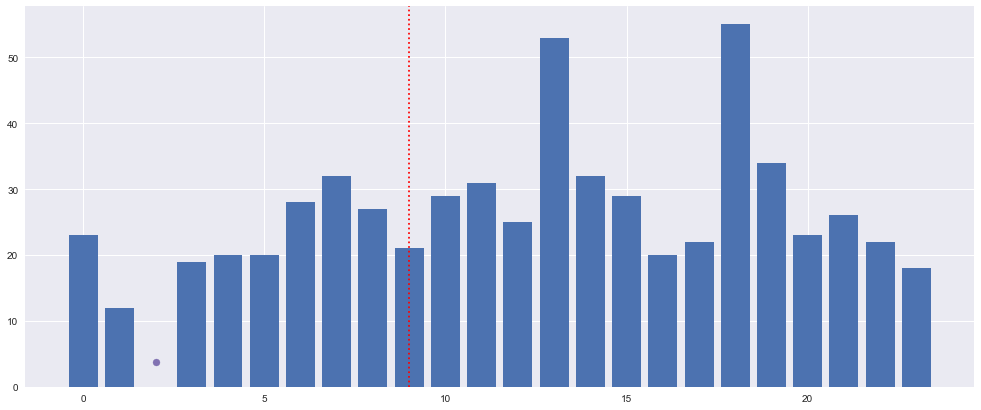

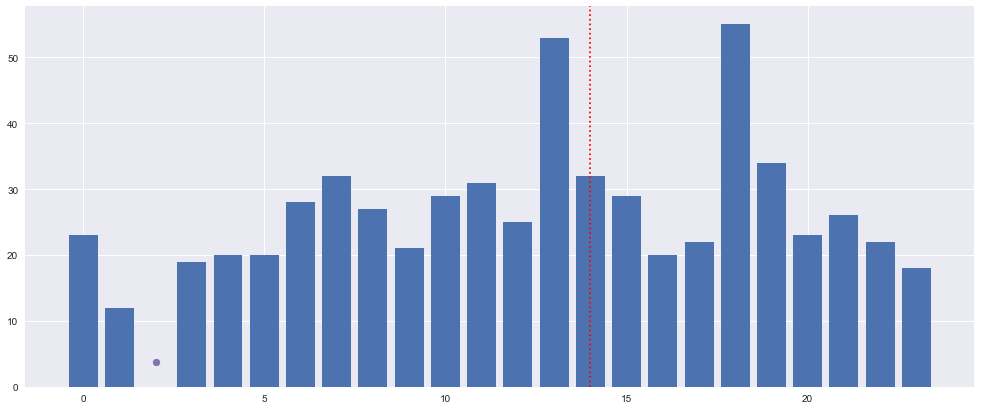

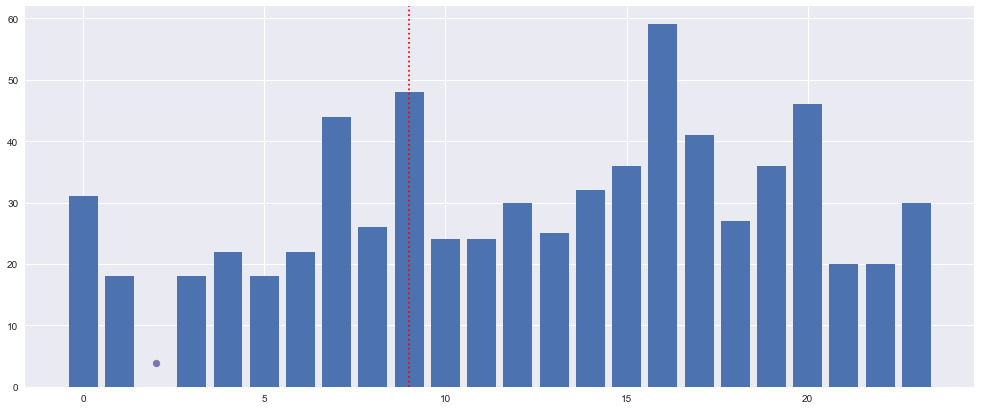

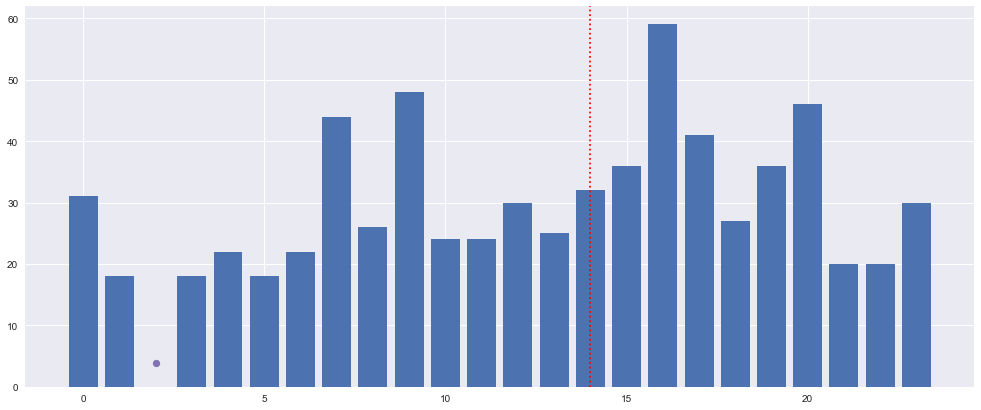

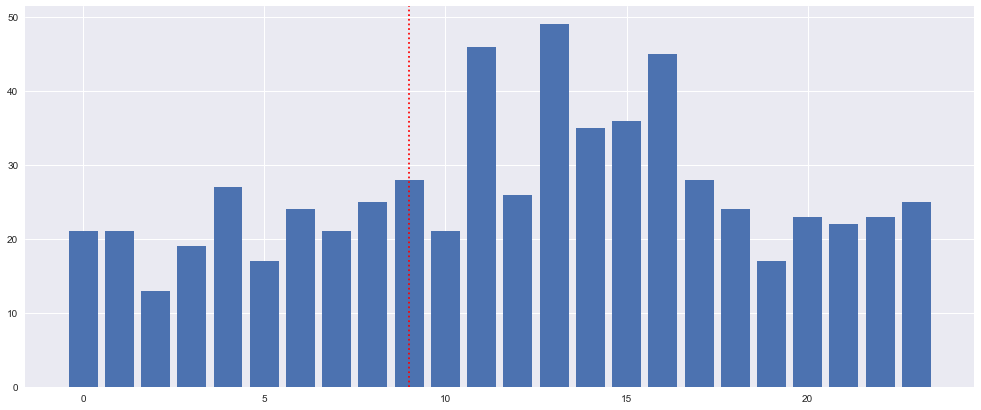

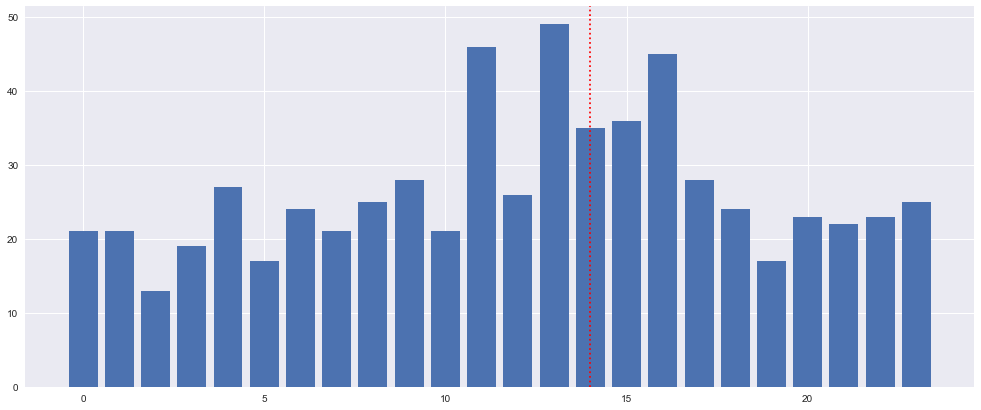

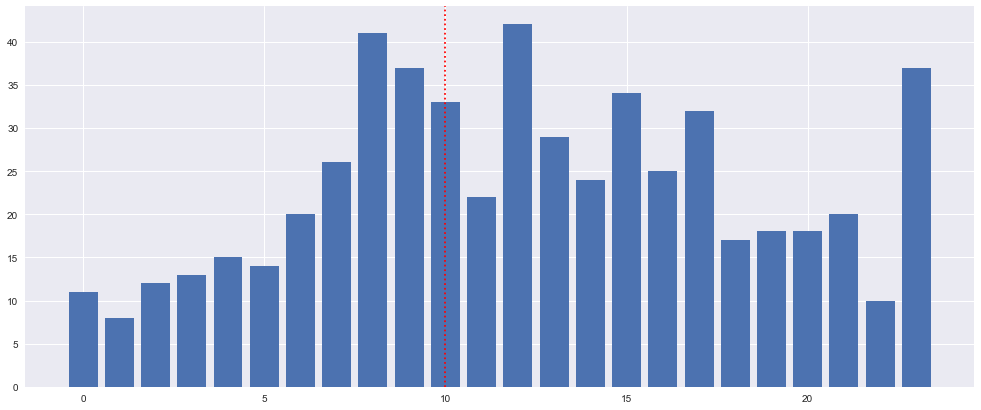

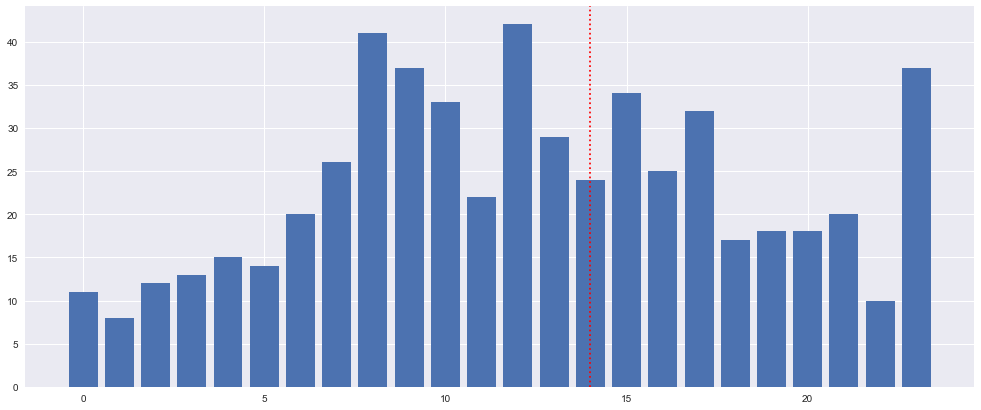

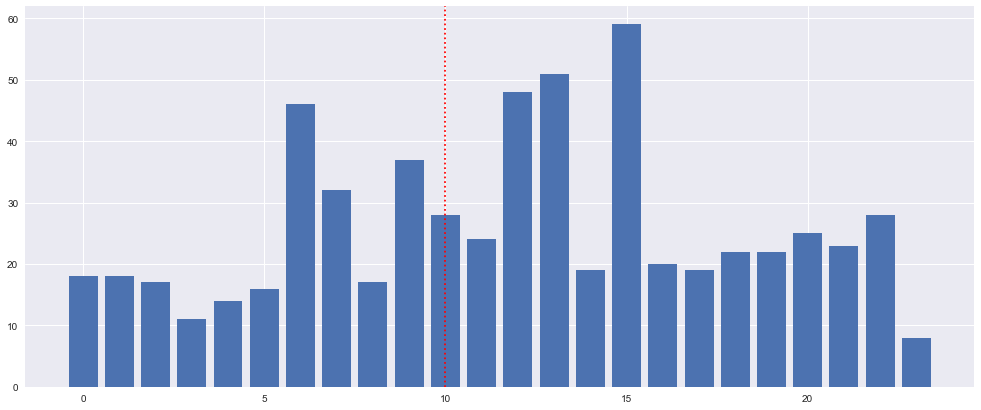

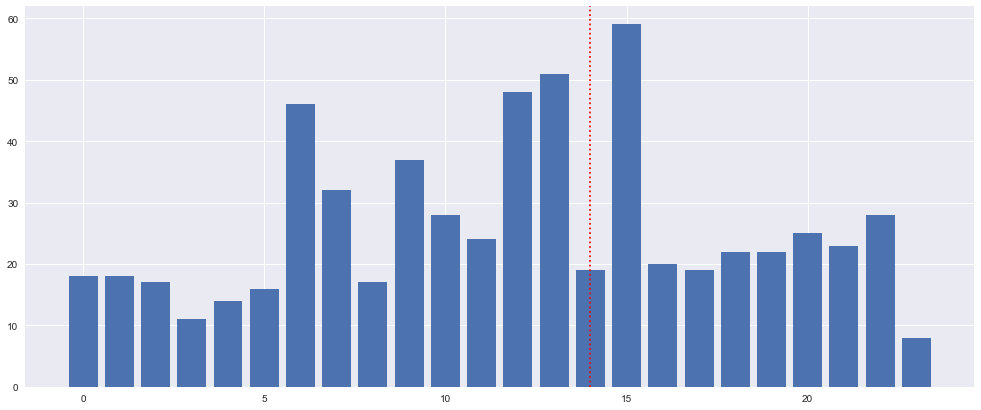

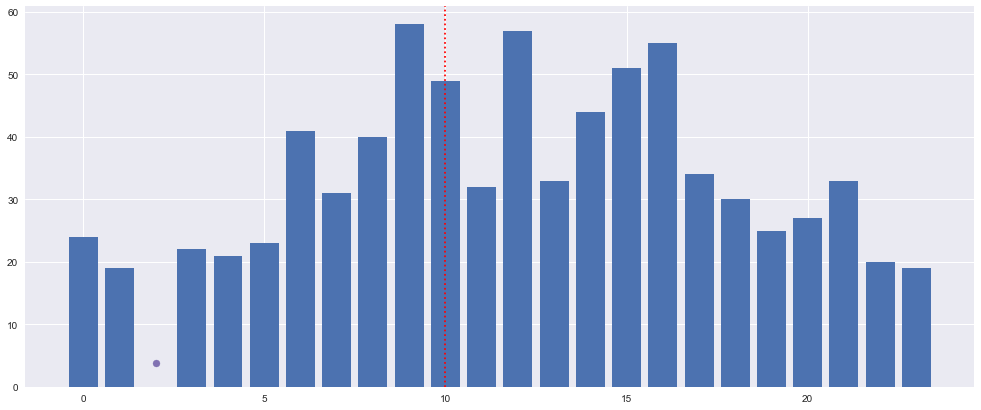

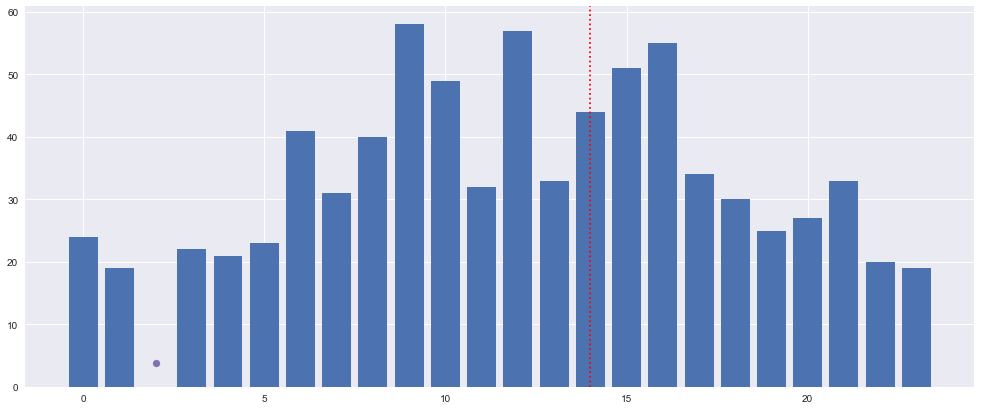

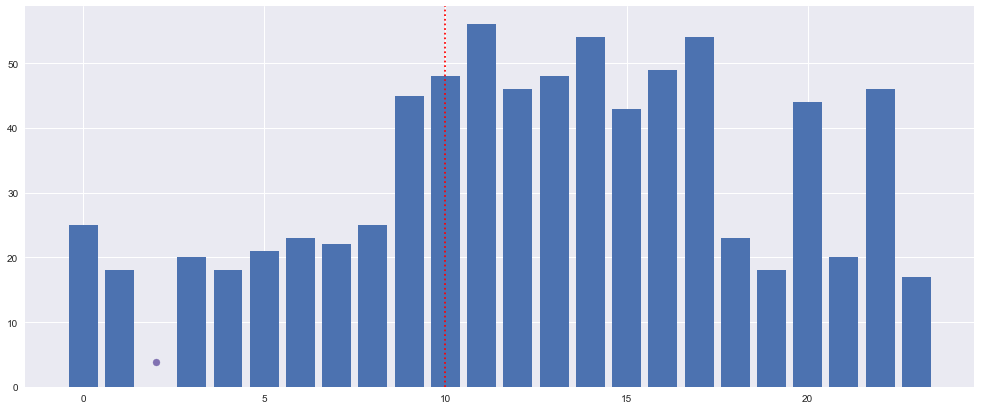

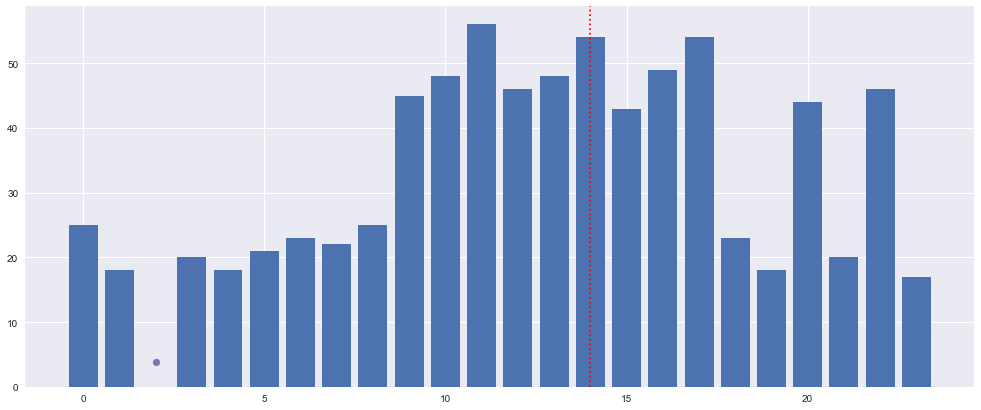

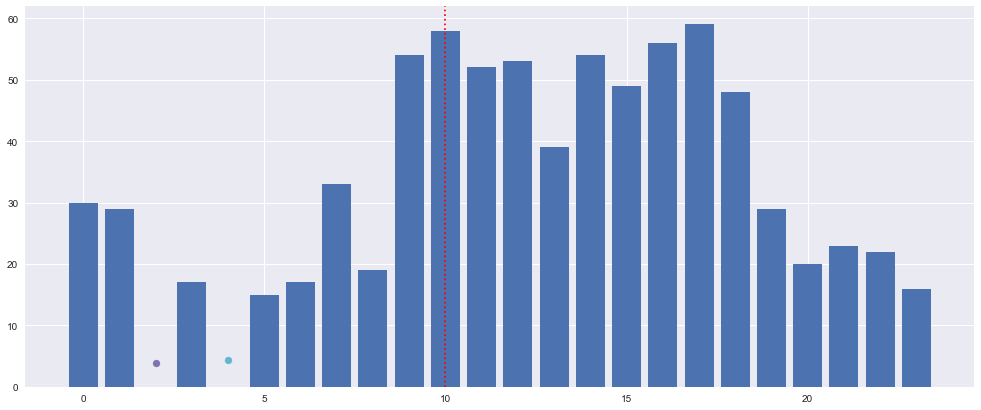

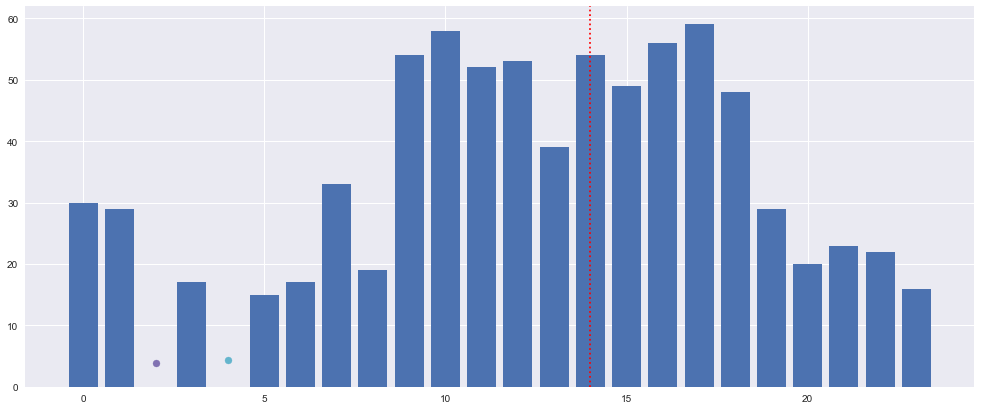

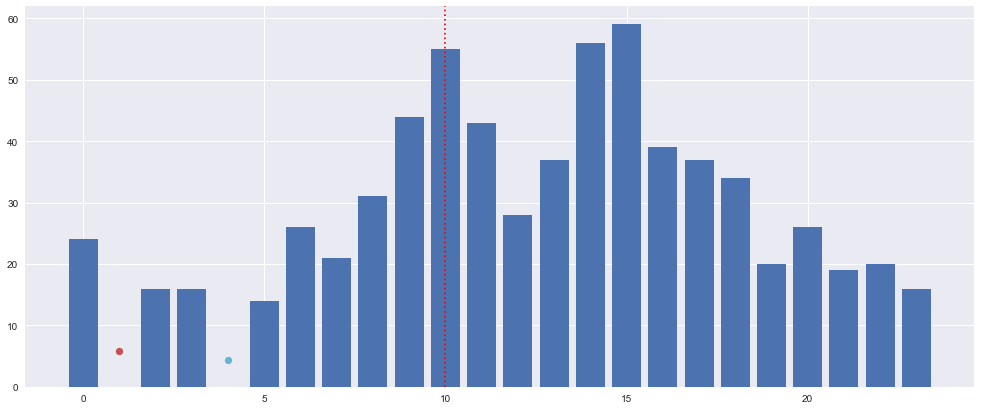

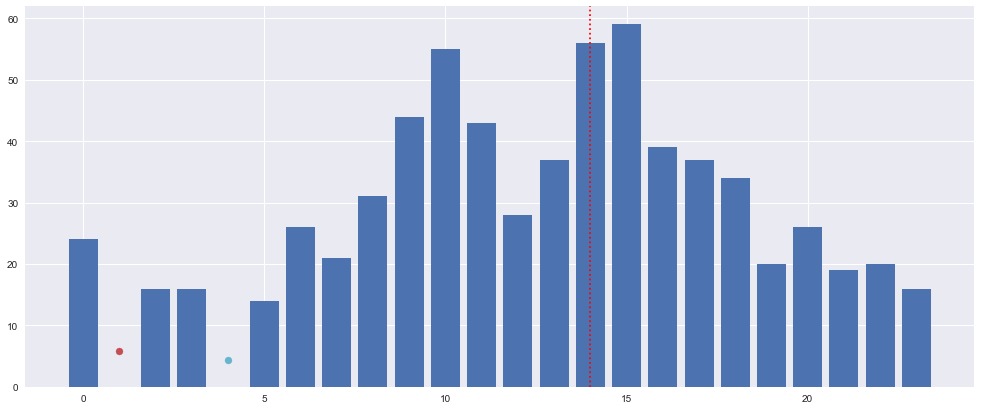

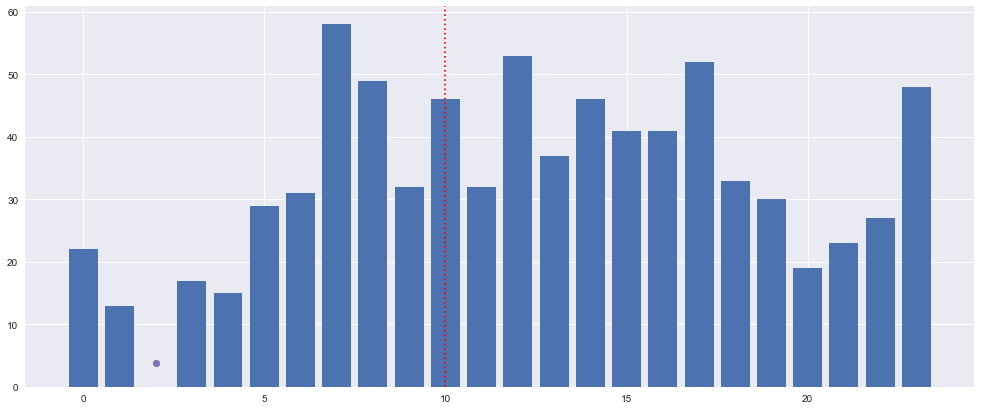

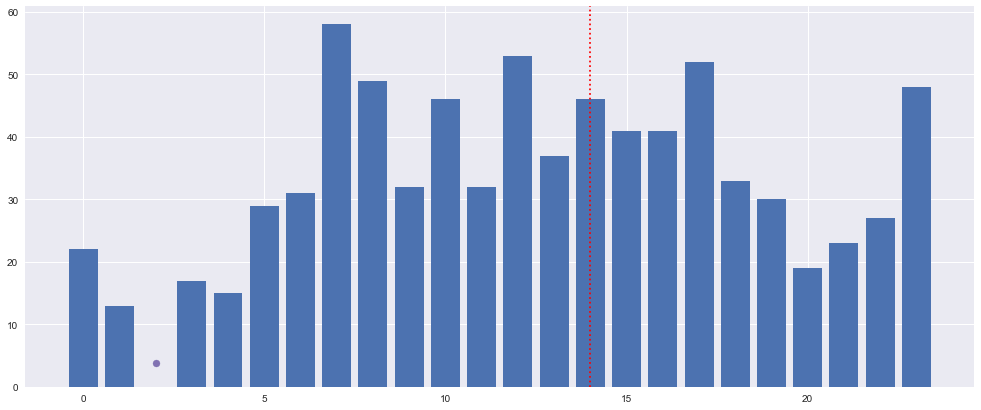

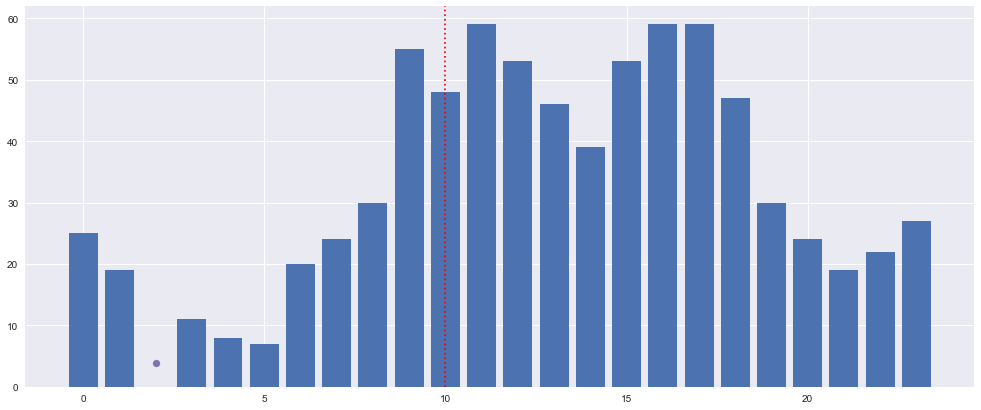

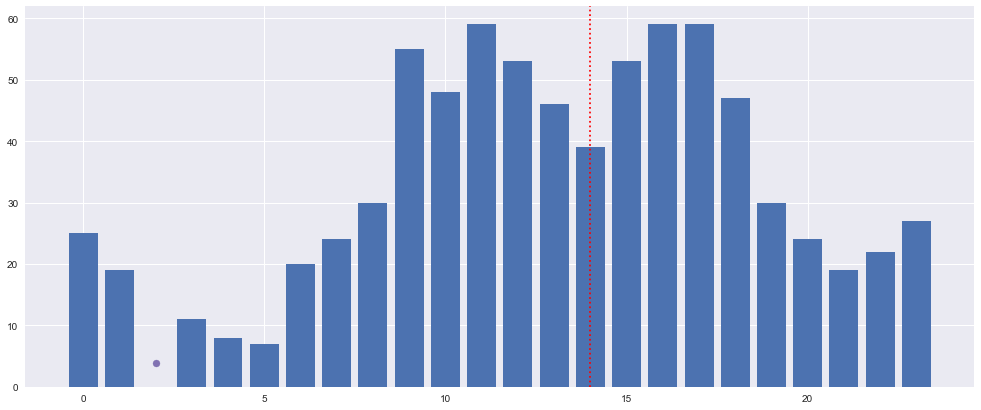

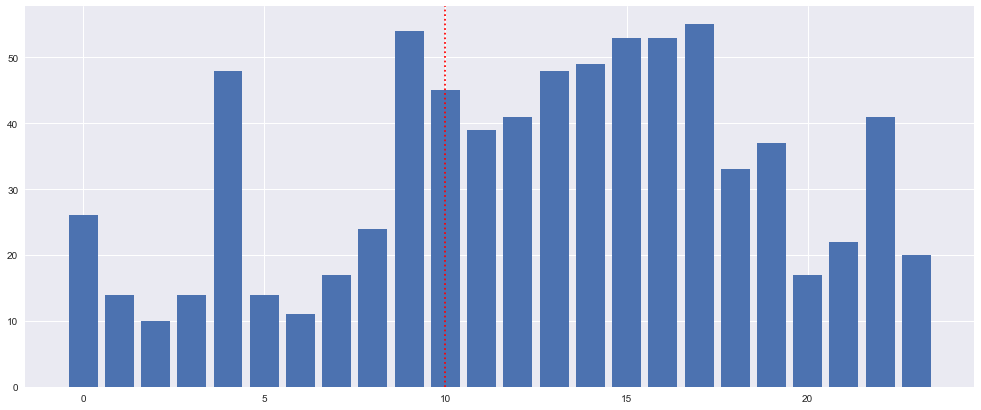

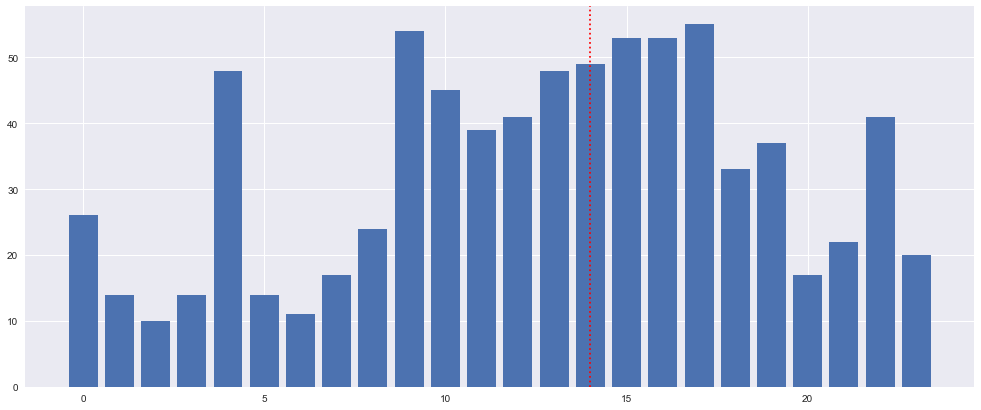

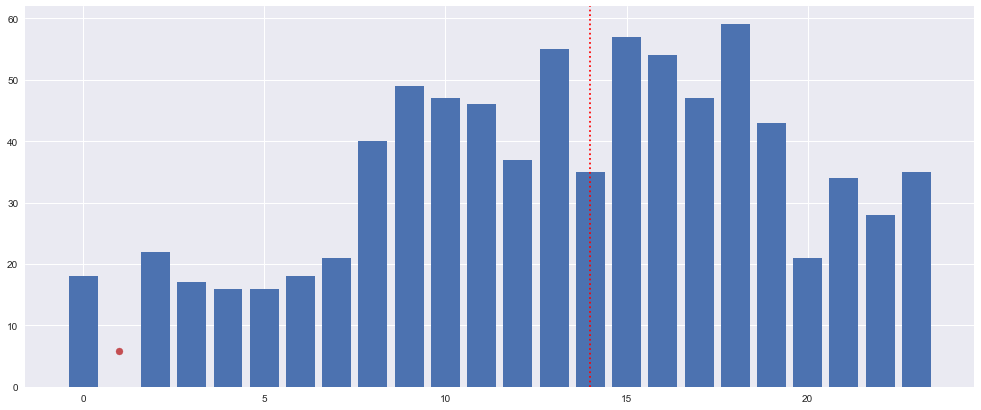

In [104]:
plt.rcParams['figure.figsize'] = (17, 7)

df_1ve=dw_per_ven[3]# Parken ; Vega;  Forum ;  Bella Center;  DR Koncerthuset;  Royal Arena;   
                     #  0       1      2          3               4                 5
    
ev_1ven=list_event_per_ven[5]  #0:DrKoncerthuset 1:Forum   2: RoyalArena  3: Vega 4:Parken  5:  BellaCenter

ev_1ven=ev_1ven[ev_1ven['starting_time'].dt.year==2017]
for data in ev_1ven.starting_time:
    mo=data.month
    day=data.day
    hour=data.hour
    df_1m=df_1ve[df_1ve['ObservedArrivalDateTime'].dt.month==mo]
    df_1d=df_1m[df_1m['ObservedArrivalDateTime'].dt.day==day]
    
    plt.bar( df_1d['ObservedArrivalDateTime'].dt.hour,df_1d['DwellSeconds'])
    
    plt.axvline(x=hour, color='r', linestyle=':')
    
    for i in range(24):
        plt.scatter(i,np.mean(df_1ve['DwellSeconds'][df_1ve['hours']==i]))
    
    plt.show()